## PROYECTO ##

El proyecto consiste en el análisis de un dataset con información sobre teléfonos móviles. 
Tenemos que limpiar el dataset y completar los valores nules, especialmente los valores de la columna 'rating' que es la que nos interesa especialemente.

Empezamos importando las librerias que vamos a necesitar

## IMPORTACIÓN DE LIBRERÍAS Y ANÁLISIS INICIAL DE DATOS ##


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import requests
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sys
sys.path.append('../')


Importamos ahora el archivo original

In [2]:
df = pd.read_csv('src/data/raw/smartphonesmessy.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,Apple iPhone 14,"₹65,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,Xiaomi Redmi Note 12 Pro Plus,"₹29,999",86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,Nothing Phone 1,"₹26,749",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,OnePlus Nord 2T 5G,"₹28,999",84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio


Eliminamos el símbolo de la rupia india de la columna price

In [5]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',','').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   float64
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(2), object(9)
memory usage: 87.8+ KB


In [7]:
df.isna().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

Veamos si hay valores duplicados

In [8]:
df.duplicated().sum()

0

Veamos ahora los valores de cada columna

In [9]:
df['sim'].value_counts()

sim
Dual Sim, 3G, 4G, VoLTE, Wi-Fi                               324
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      268
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi                           155
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster                54
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster           52
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                           46
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster                    46
Dual Sim                                                      13
Dual Sim, 3G, 4G, Wi-Fi                                        9
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC                  7
Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      7
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster                5
Dual Sim, 3G, 4G, VoLTE                                        5
Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                          4
Single Sim                                                     4
Single Sim, 3G, 4G, V

In [10]:
df['processor'].value_counts()

processor
Dimensity 700 5G, Octa Core, 2.2 GHz Processor      29
Helio P35, Octa Core, 2.3 GHz Processor             27
Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor    26
Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor     23
Snapdragon 695, Octa Core, 2.2 GHz Processor        23
                                                    ..
Snapdragon 425, Quad Core, 1.4 GHz Processor         1
Snapdragon MSM8909, Quad Core, 1.1 GHz Processor     1
Snapdragon 720G , Octa Core, 2.3 GHz Processor       1
Fusion APL1024, Quad Core, 2.37 GHz Processor        1
Google  Tensor 3, Octa Core Processor                1
Name: count, Length: 298, dtype: int64

In [11]:
df['ram'].value_counts()

ram
8 GB RAM, 128 GB inbuilt            267
6 GB RAM, 128 GB inbuilt            190
4 GB RAM, 64 GB inbuilt             143
12 GB RAM, 256 GB inbuilt            70
8 GB RAM, 256 GB inbuilt             70
4 GB RAM, 128 GB inbuilt             62
3 GB RAM, 32 GB inbuilt              37
6 GB RAM, 64 GB inbuilt              29
2 GB RAM, 32 GB inbuilt              24
3 GB RAM, 64 GB inbuilt              15
12 GB RAM, 512 GB inbuilt            10
6 GB RAM, 256 GB inbuilt              7
4 GB RAM, 32 GB inbuilt               6
16 GB RAM, 256 GB inbuilt             6
1 GB RAM, 16 GB inbuilt               6
2 GB RAM, 16 GB inbuilt               4
2 GB RAM, 64 GB inbuilt               4
12 GB RAM, 128 GB inbuilt             4
6 GB RAM, 512 GB inbuilt              4
6 GB RAM, 1 TB inbuilt                4
Unisoc T107                           3
1200 mAh Battery                      3
64 MB RAM, 128 MB inbuilt             3
4 GB RAM, 256 GB inbuilt              3
512 MB RAM, 4 GB inbuilt            

In [12]:
df['battery'].value_counts()

battery
5000 mAh Battery with 33W Fast Charging      103
5000 mAh Battery with 18W Fast Charging       89
5000 mAh Battery                              74
5000 mAh Battery with 67W Fast Charging       30
5000 mAh Battery with 10W Fast Charging       28
                                            ... 
4730 mAh Battery with 80W Fast Charging        1
6000 mAh Battery with 45W Fast Charging        1
5000 mAh Battery with 135W Fast Charging       1
3520 mAh Battery with Fast Charging            1
5000 mAh Battery with 68.2W Fast Charging      1
Name: count, Length: 256, dtype: int64

In [13]:
df['display'].value_counts()

display
6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole    54
6.5 inches, 720 x 1600 px Display with Water Drop Notch        36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole     25
6.52 inches, 720 x 1600 px Display with Water Drop Notch       23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole      22
                                                               ..
6.56 inches, 720 x 1612 px, 90 Hz Display with Punch Hole       1
6.8 inches, 1080 x 2460 px, 144 Hz Display with Punch Hole      1
6.62 inches, 2408 x 1080 px Display with Punch Hole             1
2 inches, 128 x 160 px Display                                  1
6.8 inches, 1080 x 2400 px Display with Punch Hole              1
Name: count, Length: 369, dtype: int64

In [14]:
df['camera'].value_counts()

camera
50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera           40
64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera           38
50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front Camera           34
13 MP + 2 MP Dual Rear & 5 MP Front Camera                     23
50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front Camera            20
                                                               ..
20 MP + 16 MP Dual Rear & 16 MP Front Camera                    1
108 MP + 50 MP + 48 MP Triple Rear & 32 MP Front Camera         1
64 MP + 64 MP + 64 MP Triple Rear & 16 MP Front Camera          1
64 MP + 13 MP Dual Rear & 16 MP Front Camera                    1
48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP Front Camera     1
Name: count, Length: 285, dtype: int64

In [15]:
df['card'].value_counts()

card
Memory Card Supported, upto 1 TB                          171
Memory Card Not Supported                                 112
Android v12                                               107
Memory Card Supported, upto 512 GB                        105
Memory Card (Hybrid), upto 1 TB                            91
                                                         ... 
Memory Card Supported, upto 16 GB                           1
50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera           1
2 MP Rear Camera                                            1
Android v12.1                                               1
50 MP + 50 MP + 10 MP Triple Rear & 32 MP Front Camera      1
Name: count, Length: 63, dtype: int64

In [16]:
df['os'].value_counts()

os
Android v12                           287
Android v11                           233
No FM Radio                           192
Android v10                            58
Android v13                            45
Bluetooth                              38
Android v9.0 (Pie)                     27
Android v10.0                          22
iOS v16                                14
iOS v15                                10
Android v8.1 (Oreo)                    10
Memory Card Not Supported               6
Android v11.0                           4
Browser                                 4
Android v8.0 (Oreo)                     4
iOS v13                                 3
Android v6.0 (Marshmallow)              3
iOS v15.0                               3
Memory Card Supported, upto 32 GB       3
Android v5.1.1 (Lollipop)               2
Memory Card (Hybrid), upto 2 TB         2
Harmony v2.0                            2
Memory Card Supported, upto 64 GB       2
Memory Card (Hybrid), upto 256 

De una primer análisis, nos damos cuenta que hay valores que están en la columna equivocad. En concreto las siguientes columnas tienen valores que no corresponden a su columna:

* 'processor'
* 'ram'
* 'battery'
* 'display'
* 'camera'
* 'card'
* 'os'

## FEATURE ENGINEERING ##

En esta sección vamos, que nos va a ocupar casi todo el EDA, tratamos de corregir las columnas con datos erróneos y colocarlas en la columna correcta.

También vamos a tratar de obtener información de los textos que hay en estas columnas, para convertirlos en valores numéricos.

El objetivo del EDA es imputar los valores NaN de la columna 'rating' con algún modelo basado en valores de otras columnas del dataset.

Empezamos por quitar provisionalmente la columna 'rating' de nuestro dataset. Hacemos para ello una copia del mismo

In [17]:
df_corregido = df.drop('rating', axis=1)

Dado que el resto de valores NaN se encuentran en columnas que vamos a modificar, de momento los sustituimos por el valor "sin datos"

In [18]:
df_corregido['camera'].fillna('sin datos', inplace=True)
df_corregido['os'].fillna('sin datos', inplace=True)
df_corregido['card'].fillna('sin datos', inplace=True)

En primer lugar vamos a localizar las filas de la columna 'battery' que no tiene el texto 'mAh', que parece ser común a los valores correctos de esta columna

In [19]:
df_corregido[~df_corregido['battery'].str.contains('mAh')]

,model,price,sim,processor,ram,battery,display,camera,card,os
111,Apple iPhone 12,51999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,Apple iPhone 12 Mini,40999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,Apple iPhone 12 (128GB),55999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,Apple iPhone 12 Mini (128GB),45999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,Nokia 2660 Flip,4649.0,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,Apple iPhone SE 3 2022,43900.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,Apple iPhone 15 Pro,130990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
551,itel Magic 2 4G,2399.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
582,Nokia 8210 4G,3749.0,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
608,Namotel Achhe Din,99.0,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,sin datos


In [20]:
rows_to_shift1 = df_corregido[~df_corregido['battery'].str.contains('mAh')].index # Seleccionamos los valores de la columna 'battery' que no contengan 'mAh'
df_corregido.iloc[rows_to_shift1,5:-1] = df_corregido.iloc[rows_to_shift1,5:-1].shift(1,axis=1) # Desplazamos las filas que no tienen 'battery' a la derecha

In [21]:
df_corregido.iloc[rows_to_shift1]

,model,price,sim,processor,ram,battery,display,camera,card,os
111,Apple iPhone 12,51999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,No FM Radio
149,Apple iPhone 12 Mini,40999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,No FM Radio
307,Apple iPhone 12 (128GB),55999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,No FM Radio
363,Apple iPhone 12 Mini (128GB),45999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,No FM Radio
376,Nokia 2660 Flip,4649.0,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,None,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera
439,Apple iPhone SE 3 2022,43900.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,No FM Radio
448,Apple iPhone 15 Pro,130990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,No FM Radio
551,itel Magic 2 4G,2399.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,None,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display","Memory Card Supported, upto 64 GB"
582,Nokia 8210 4G,3749.0,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,None,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display","Memory Card Supported, upto 32 GB"
608,Namotel Achhe Din,99.0,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,None,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),sin datos


Hacemos ahora lo mismo con las filas de la columna 'camera' que no contienen las letras 'MP'

In [22]:
df_corregido[~df_corregido['camera'].str.contains('MP')]

,model,price,sim,processor,ram,battery,display,camera,card,os
69,Oppo Find N Fold,99990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
98,Vivo X Fold 5G,106990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
155,Nokia 2780 Flip,4990.0,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,Oppo Find N2 5G,94990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,Xiaomi Mix Fold 2 5G,106990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,Nokia 2720 V Flip,6199.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,Samsung Galaxy Z Flip 3,69999.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
321,Samsung Galaxy Z Fold 4,154998.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,Royole FlexPai 2,109999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display","Foldable Display, Dual Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
365,OPPO Find N Flip,89990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported


In [23]:
rows_to_shift2 = df_corregido[~df_corregido['camera'].str.contains('MP')].index # Seleccionamos los valores de la columna 'camera' que no contengan 'MP'
df_corregido.iloc[rows_to_shift2,7:-1] = df_corregido.iloc[rows_to_shift2,7:].shift(-1,axis=1) # Desplazamos las filas que no tienen 'camera' a la izquierda

In [24]:
df_corregido.iloc[rows_to_shift2]

,model,price,sim,processor,ram,battery,display,camera,card,os
69,Oppo Find N Fold,99990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12,Android v12
98,Vivo X Fold 5G,106990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,Android v12,Android v12
155,Nokia 2780 Flip,4990.0,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,"Memory Card Supported, upto 32 GB","Memory Card Supported, upto 32 GB"
159,Oppo Find N2 5G,94990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Memory Card Not Supported
236,Xiaomi Mix Fold 2 5G,106990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12,Android v12
271,Nokia 2720 V Flip,6199.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Memory Card Supported
306,Samsung Galaxy Z Flip 3,69999.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
321,Samsung Galaxy Z Fold 4,154998.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12,Android v12
322,Royole FlexPai 2,109999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB","Memory Card Supported, upto 256 GB"
365,OPPO Find N Flip,89990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported


Vemos ahora los valores de la columna 'os' que contiene las letras 'Memory', como indicador de que no están en la fila correcta

In [25]:
df_corregido[df_corregido['os'].str.contains('Memory')]

,model,price,sim,processor,ram,battery,display,camera,card,os
155,Nokia 2780 Flip,4990.0,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,"Memory Card Supported, upto 32 GB","Memory Card Supported, upto 32 GB"
159,Oppo Find N2 5G,94990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Memory Card Not Supported
271,Nokia 2720 V Flip,6199.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Memory Card Supported
306,Samsung Galaxy Z Flip 3,69999.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
322,Royole FlexPai 2,109999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB","Memory Card Supported, upto 256 GB"
365,OPPO Find N Flip,89990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
392,OPPO Find N2 Flip,70990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
504,Samsung Galaxy Z Flip 4 5G,89999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
551,itel Magic 2 4G,2399.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,None,"64 MB RAM, 128 MB inbuilt","2.4 inches, 240 x 320 px Display","Memory Card Supported, upto 64 GB","Memory Card Supported, upto 64 GB"
570,LG Wing 5G,54999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,"Memory Card (Hybrid), upto 2 TB","Memory Card (Hybrid), upto 2 TB"


In [26]:
rows_to_fix1 = df_corregido[df_corregido['os'].str.contains('Memory')].index # Buscamos los valores de 'os' que contengan 'Memory'
df_corregido.iloc[rows_to_fix1,-1] = None # Reemplazamos los valores que contienen 'Memory' por None

In [27]:
df_corregido.iloc[rows_to_fix1]

,model,price,sim,processor,ram,battery,display,camera,card,os
155,Nokia 2780 Flip,4990.0,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,"Memory Card Supported, upto 32 GB",None
159,Oppo Find N2 5G,94990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,None
271,Nokia 2720 V Flip,6199.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,None
306,Samsung Galaxy Z Flip 3,69999.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,None
322,Royole FlexPai 2,109999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB",None
365,OPPO Find N Flip,89990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,None
392,OPPO Find N2 Flip,70990.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,None
504,Samsung Galaxy Z Flip 4 5G,89999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,None
551,itel Magic 2 4G,2399.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,None,"64 MB RAM, 128 MB inbuilt","2.4 inches, 240 x 320 px Display","Memory Card Supported, upto 64 GB",None
570,LG Wing 5G,54999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,"Memory Card (Hybrid), upto 2 TB",None


Vemos ahora las filas de la columna 'card' que contienen la palabra 'Android' como indicador de que no están en la fila correcta. Procedemos a su corrección

In [28]:
df_corregido[df_corregido['card'].str.contains('Android')]

,model,price,sim,processor,ram,battery,display,camera,card,os
8,Nothing Phone 1,26749.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,OnePlus Nord 2T 5G,28999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio
12,Xiaomi Redmi Note 12 Pro 5G,24762.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
17,OPPO Reno 9 Pro Plus,45999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,No FM Radio
18,OnePlus 10R 5G,32999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth
...,...,...,...,...,...,...,...,...,...,...
1011,Oppo Find X6,69990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio
1012,itel A23s,4787.0,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio
1013,Google Pixel 8 Pro,70990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,No FM Radio
1014,Vivo X Fold 2,119990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Android v12,Android v12


In [29]:
rows_to_fix2 = df_corregido[df_corregido['card'].str.contains('Android')].index # Buscamos los valores de 'card' que contengan 'Android'
df_corregido.iloc[rows_to_fix2,8:] = df_corregido.iloc[rows_to_fix2,8:].shift(1,axis=1) # Desplazamos estas filas una posición a la derecha

In [30]:
df_corregido.iloc[rows_to_fix2]

,model,price,sim,processor,ram,battery,display,camera,card,os
8,Nothing Phone 1,26749.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,None,Android v12
9,OnePlus Nord 2T 5G,28999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v12
12,Xiaomi Redmi Note 12 Pro 5G,24762.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
17,OPPO Reno 9 Pro Plus,45999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v13
18,OnePlus 10R 5G,32999.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
...,...,...,...,...,...,...,...,...,...,...
1011,Oppo Find X6,69990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,None,Android v12
1012,itel A23s,4787.0,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,None,Android v11
1013,Google Pixel 8 Pro,70990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,None,Android v13
1014,Vivo X Fold 2,119990.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,None,Android v12


In [31]:
df_corregido.to_csv('src/data/process/smartphones_corregido.csv', index=True)

Volvemos a añadir la columna 'rating' al dataframe

In [32]:
df_rating = df['rating']

In [33]:
df_corregido['rating'] = df_rating

In [34]:
df_corregido.to_csv('src/data/smartphones_corregido_con_rating.csv', index=True)

In [35]:
df_corregido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   float64
 2   sim        1020 non-null   object 
 3   processor  1020 non-null   object 
 4   ram        1020 non-null   object 
 5   battery    987 non-null    object 
 6   display    1020 non-null   object 
 7   camera     1020 non-null   object 
 8   card       798 non-null    object 
 9   os         999 non-null    object 
 10  rating     879 non-null    float64
dtypes: float64(2), object(9)
memory usage: 87.8+ KB


In [36]:
df_corregido.isna().sum()

model          0
price          0
sim            0
processor      0
ram            0
battery       33
display        0
camera         0
card         222
os            21
rating       141
dtype: int64

Las columnas que tiene valores nulos tienen el valor None, se han quedado vacías como consecuencia de las operaciones realizadas anteriormente

Vamos a explorar las columnas con variables categóricas

Vamos a dividir la columna sim, de manera que cada uno de los valores que hay en esa columna entre comillas sea una nueva columna.

En las nuevas columnas creadas, las filas tendrán valor 1 si el celular tiene esa característica y 0 si no la tiene,

In [37]:
sim_values = set(df_corregido['sim'].str.split(',').explode())
sim_values

{' 3G',
 ' 4G',
 ' 5G',
 ' IR Blaster',
 ' NFC',
 ' Vo5G',
 ' VoLTE',
 ' Wi-Fi',
 'Dual Sim',
 'Single Sim',
 'Wi-Fi'}

In [38]:
sim_values = list(sim_values)

In [39]:
sim_values = [sim.strip() for sim in sim_values] # Quitamos los espacios iniciales y finales de los valores

In [40]:
sim_values = set(sim_values) # Volvemos a convertir la lista en un conjunto para garantizar que no tenemos valores duplicados.
sim_values

{'3G',
 '4G',
 '5G',
 'Dual Sim',
 'IR Blaster',
 'NFC',
 'Single Sim',
 'Vo5G',
 'VoLTE',
 'Wi-Fi'}

In [41]:
# Convertimos los valores de 'sim' a valores binarios
for value in sim_values:
    df_corregido[value] = df_corregido['sim'].str.contains(value).astype(float)

In [42]:
df_corregido = df_corregido.drop('sim', axis=1) # Eliminamos la columna 'sim', que ya no la vamos a necesitar

In [43]:
df_corregido.head(10)

,model,price,processor,ram,battery,display,camera,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC
0,OnePlus 11 5G,54999.0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,OnePlus Nord CE 2 Lite 5G,19989.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,Samsung Galaxy A14 5G,16499.0,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,Motorola Moto G62 5G,14999.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,Realme 10 Pro Plus,24999.0,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,82.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999.0,"Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12,80.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
6,Apple iPhone 14,65999.0,"Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
7,Xiaomi Redmi Note 12 Pro Plus,29999.0,"Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12,86.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
8,Nothing Phone 1,26749.0,"Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,None,Android v12,85.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
9,OnePlus Nord 2T 5G,28999.0,"Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v12,84.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


De la columna 'processor', vamos a extraer el nombre del procesador, el número de cores y la velocidad del procesador

In [44]:
df_corregido['Processor Name'] = df_corregido['processor'].str.split(',', expand=True)[0]

In [45]:
df_corregido['Processor No. of Cores'] = df_corregido['processor'].str.extract(r'(\w+)\s+Core')
condition=[df_corregido['Processor No. of Cores']=='Octa',df_corregido['Processor No. of Cores']=='Hexa',df_corregido['Processor No. of Cores']=='Quad',
           df_corregido['Processor No. of Cores']=='Dual',df_corregido['Processor No. of Cores']=='Single']
values = [8,6,4,2,1]
df_corregido['Processor No. of Cores'] = np.select(condition,values,default=np.NaN).astype('int64')

df_corregido['Processor Speed'] = df_corregido['processor'].str.extract(r'(\d+\.\d*)\s+GHz').astype('float64')
df_corregido['Processor Speed'] = df_corregido['Processor Speed'].fillna(value = df_corregido['Processor Speed'].mode()[0])

df_corregido.drop(columns=['processor'], inplace=True)
df_corregido.head(3)

C:\Users\manue\AppData\Local\Temp\ipykernel_19892\2061954575.py:5: RuntimeWarning: invalid value encountered in cast
  df_corregido['Processor No. of Cores'] = np.select(condition,values,default=np.NaN).astype('int64')


,model,price,ram,battery,display,camera,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed
0,OnePlus 11 5G,54999.0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2
1,OnePlus Nord CE 2 Lite 5G,19989.0,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2
2,Samsung Galaxy A14 5G,16499.0,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4


La columna 'ram' tiene información sobre la memoria RAM y la memoria interna del celular (ROM)

In [46]:
df_corregido['Ram Size(GB)'] = df_corregido['ram'].str.extract(r'(\d+)\s+GB+\s+RAM').astype('float64')
df_corregido['ram'] = df_corregido['ram'].str.replace(r'1 TB',r'1000 GB')
df_corregido['Rom Size(GB)'] = df_corregido['ram'].str.extract(r'(\d+)\s+GB+\s+inbuilt').astype('float64')
df_corregido['Ram Size(GB)'] = df_corregido['Ram Size(GB)'].fillna(value = df_corregido['Ram Size(GB)'].mode()[0])

df_corregido.drop(columns=['ram'],inplace=True)
df_corregido.head(3)

,model,price,battery,display,camera,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB)
0,OnePlus 11 5G,54999.0,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0
1,OnePlus Nord CE 2 Lite 5G,19989.0,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0
2,Samsung Galaxy A14 5G,16499.0,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0


Extraemos el valor del tamaño de la batería

In [47]:
df_corregido['Battery Capacity'] = df_corregido['battery'].str.extract(r'(\d+)\s+mAh').astype('float64')
df_corregido['Battery Capacity'] = df_corregido['Battery Capacity'].fillna(value = df_corregido['Battery Capacity'].mode()[0])


df_corregido.drop(columns=['battery'],inplace=True)
df_corregido.head(3)

,model,price,display,camera,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity
0,OnePlus 11 5G,54999.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0
1,OnePlus Nord CE 2 Lite 5G,19989.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0
2,Samsung Galaxy A14 5G,16499.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0


Sacamos información de la columna 'display'

In [48]:
df_corregido['Display Size(inches)'] = df_corregido['display'].str.extract(r'(\d+\.\d*)\s+inches').astype('float64')
df_corregido['Display Refresh Rate'] = df_corregido['display'].str.extract(r'(\d+)\s+Hz').fillna(value='60').astype('int64')

df_corregido['Display Size(inches)'] = df_corregido['Display Size(inches)'].fillna(value = df_corregido['Display Size(inches)'].mode()[0])

df_corregido.drop(columns=['display'],inplace=True)
df_corregido.head(3)

,model,price,camera,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate
0,OnePlus 11 5G,54999.0,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0,6.70,120
1,OnePlus Nord CE 2 Lite 5G,19989.0,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.59,120
2,Samsung Galaxy A14 5G,16499.0,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0,6.60,90


Extraemos información de la Cámara

In [49]:
df_corregido[['tr','tf']] = df_corregido['camera'].str.split('Rear',expand=True)

df_corregido[['Rear Camera 1','Rear Camera 2','Rear Camera 3']] = df_corregido['tr'].str.extractall(r'(\d+)\s*MP').unstack().fillna(value=0).astype('int64')
df_corregido['Front Camera'] = df_corregido['tf'].str.extract(r'(\d+)\s+MP').fillna(value=0).astype('int64')

df_corregido.drop(columns=['camera','tr','tf'],inplace=True)
df_corregido.head(3)

,model,price,card,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,Rear Camera 1,Rear Camera 2,Rear Camera 3,Front Camera
0,OnePlus 11 5G,54999.0,Memory Card Not Supported,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0,6.70,120,50.0,48.0,32.0,16
1,OnePlus Nord CE 2 Lite 5G,19989.0,"Memory Card (Hybrid), upto 1 TB",Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.59,120,64.0,2.0,2.0,16
2,Samsung Galaxy A14 5G,16499.0,"Memory Card Supported, upto 1 TB",Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0,6.60,90,50.0,2.0,2.0,13


Extraemos información de la columna 'card'

In [50]:
df_corregido['External Card Support'] = np.where(df_corregido['card'].str.contains('Not Supported'),0,1)

df_corregido.drop(columns=['card'],inplace=True)
df_corregido.head(3)

,model,price,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,Rear Camera 1,Rear Camera 2,Rear Camera 3,Front Camera,External Card Support
0,OnePlus 11 5G,54999.0,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0,6.70,120,50.0,48.0,32.0,16,0
1,OnePlus Nord CE 2 Lite 5G,19989.0,Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.59,120,64.0,2.0,2.0,16,1
2,Samsung Galaxy A14 5G,16499.0,Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0,6.60,90,50.0,2.0,2.0,13,1


Extraemos información del sistema operativo

In [51]:
replacements = {'v11.0':'v11', 'v10.0':'v10','v13.0':'v13','v15.0':'v15','No FM Radio':'Android'}
df_corregido['os'] = df_corregido['os'].str.replace(r'v11.0|v10.0|v13.0|v15.0|No\s+FM\s+Radio',lambda x: replacements[x.group(0)],regex=True)
df_corregido['os'] = df_corregido['os'].fillna(value='Android')

df_corregido.head(5)

,model,price,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,Rear Camera 1,Rear Camera 2,Rear Camera 3,Front Camera,External Card Support
0,OnePlus 11 5G,54999.0,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0,6.70,120,50.0,48.0,32.0,16,0
1,OnePlus Nord CE 2 Lite 5G,19989.0,Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.59,120,64.0,2.0,2.0,16,1
2,Samsung Galaxy A14 5G,16499.0,Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0,6.60,90,50.0,2.0,2.0,13,1
3,Motorola Moto G62 5G,14999.0,Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.55,120,50.0,8.0,2.0,16,1
4,Realme 10 Pro Plus,24999.0,Android v13,82.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Dimensity 1080,8,2.6,6.0,128.0,5000.0,6.70,120,108.0,8.0,2.0,16,0


Extraemos la información de la marca

In [52]:
df_corregido['Brand'] = df_corregido['model'].str.split(expand=True)[0]
df_corregido.head(5)

,model,price,os,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor Name,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,Rear Camera 1,Rear Camera 2,Rear Camera 3,Front Camera,External Card Support,Brand
0,OnePlus 11 5G,54999.0,Android v13,89.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Snapdragon 8 Gen2,8,3.2,12.0,256.0,5000.0,6.70,120,50.0,48.0,32.0,16,0,OnePlus
1,OnePlus Nord CE 2 Lite 5G,19989.0,Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.59,120,64.0,2.0,2.0,16,1,OnePlus
2,Samsung Galaxy A14 5G,16499.0,Android v13,75.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Exynos 1330,8,2.4,4.0,64.0,5000.0,6.60,90,50.0,2.0,2.0,13,1,Samsung
3,Motorola Moto G62 5G,14999.0,Android v12,81.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Snapdragon 695,8,2.2,6.0,128.0,5000.0,6.55,120,50.0,8.0,2.0,16,1,Motorola
4,Realme 10 Pro Plus,24999.0,Android v13,82.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Dimensity 1080,8,2.6,6.0,128.0,5000.0,6.70,120,108.0,8.0,2.0,16,0,Realme


In [53]:
df_corregido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   1020 non-null   object 
 1   price                   1020 non-null   float64
 2   os                      1020 non-null   object 
 3   rating                  879 non-null    float64
 4   Wi-Fi                   1020 non-null   float64
 5   Single Sim              1020 non-null   float64
 6   3G                      1020 non-null   float64
 7   Vo5G                    1020 non-null   float64
 8   Dual Sim                1020 non-null   float64
 9   4G                      1020 non-null   float64
 10  VoLTE                   1020 non-null   float64
 11  IR Blaster              1020 non-null   float64
 12  5G                      1020 non-null   float64
 13  NFC                     1020 non-null   float64
 14  Processor Name          1020 non-null   

In [54]:
df_corregido.isna().sum()

model                       0
price                       0
os                          0
rating                    141
Wi-Fi                       0
Single Sim                  0
3G                          0
Vo5G                        0
Dual Sim                    0
4G                          0
VoLTE                       0
IR Blaster                  0
5G                          0
NFC                         0
Processor Name              0
Processor No. of Cores      0
Processor Speed             0
Ram Size(GB)                0
Rom Size(GB)               36
Battery Capacity            0
Display Size(inches)        0
Display Refresh Rate        0
Rear Camera 1              22
Rear Camera 2              22
Rear Camera 3              22
Front Camera                0
External Card Support       0
Brand                       0
dtype: int64

Volvemos a repasar el contenido de nuestro dataset con valores nulos

In [55]:
df_corregido['Rom Size(GB)'].value_counts()

Rom Size(GB)
128.0     523
64.0      193
256.0     157
32.0       67
512.0      22
16.0       12
1000.0      5
4.0         3
8.0         2
Name: count, dtype: int64

Los valores nulos de la columna 'Rom Size(GB)' se deben a que el celular no tiene memoria interna. Le asignamos el valor 0

In [56]:
df_corregido['Rom Size(GB)'].fillna(0, inplace=True)

Lo mismo ocurre con las cámaras, el celular no tiene cámaras. Le asignamos el valor 0 a todas.

In [57]:
df_corregido['Rear Camera 1'].fillna(0, inplace=True)
df_corregido['Rear Camera 2'].fillna(0, inplace=True)
df_corregido['Rear Camera 3'].fillna(0, inplace=True)

Volvemos a hacer un repaso de nuestras columnas

In [58]:
df_corregido.isna().sum()

model                       0
price                       0
os                          0
rating                    141
Wi-Fi                       0
Single Sim                  0
3G                          0
Vo5G                        0
Dual Sim                    0
4G                          0
VoLTE                       0
IR Blaster                  0
5G                          0
NFC                         0
Processor Name              0
Processor No. of Cores      0
Processor Speed             0
Ram Size(GB)                0
Rom Size(GB)                0
Battery Capacity            0
Display Size(inches)        0
Display Refresh Rate        0
Rear Camera 1               0
Rear Camera 2               0
Rear Camera 3               0
Front Camera                0
External Card Support       0
Brand                       0
dtype: int64

In [59]:
df_corregido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   1020 non-null   object 
 1   price                   1020 non-null   float64
 2   os                      1020 non-null   object 
 3   rating                  879 non-null    float64
 4   Wi-Fi                   1020 non-null   float64
 5   Single Sim              1020 non-null   float64
 6   3G                      1020 non-null   float64
 7   Vo5G                    1020 non-null   float64
 8   Dual Sim                1020 non-null   float64
 9   4G                      1020 non-null   float64
 10  VoLTE                   1020 non-null   float64
 11  IR Blaster              1020 non-null   float64
 12  5G                      1020 non-null   float64
 13  NFC                     1020 non-null   float64
 14  Processor Name          1020 non-null   

In [60]:
df_corregido.value_counts('os')

os
Android v12                        394
Android v11                        278
Android v10                         92
Android v13                         91
Android                             38
Android v9.0 (Pie)                  29
sin datos                           16
iOS v16                             14
iOS v15                             13
Android v8.1 (Oreo)                 10
Bluetooth                            5
iOS v13                              4
Android v8.0 (Oreo)                  4
Browser                              4
Android v6.0 (Marshmallow)           3
Android v12.1                        2
RTOS (Series 30+)                    2
EMUI v12                             2
Harmony v2.0                         2
Android v5.1.1 (Lollipop)            2
1.3 MP Rear Camera                   1
Android v9 (Pie)                     1
Android v4.4.2 (KitKat)              1
HarmonyOS v2                         1
HarmonyOS v2.0                       1
Hongmeng OS v3.0      

Esta columna 'os' podemos simplificarla asignándole al celular 3 posibles valores. 'Android', 'iOS', 'Otro SO'

In [61]:
# Función para asignar 'Android', 'iOS' u 'Otro'
def asignar_sistema_operativo(valor):
    if 'Android' in valor:
        return 'Android'
    elif 'iOS' in valor:
        return 'iOS'
    else:
        return 'Otro SO'

# Aplicar la función a la columna 'os' y crear una nueva columna 'os_asignado'
df_corregido['os'] = df_corregido['os'].apply(asignar_sistema_operativo)

In [62]:
df_corregido['os'].value_counts()

os
Android    949
Otro SO     38
iOS         33
Name: count, dtype: int64

In [63]:
df_corregido.describe()

,price,rating,Wi-Fi,Single Sim,3G,Vo5G,Dual Sim,4G,VoLTE,IR Blaster,5G,NFC,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,Rear Camera 1,Rear Camera 2,Rear Camera 3,Front Camera,External Card Support
count,1020.000000,879.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1.020000e+03,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,31371.767647,78.258248,0.975490,0.020588,0.980392,0.011765,0.978431,0.979412,0.963725,0.155882,0.538235,0.385294,-3.617009e+17,2.391892,6.609804,135.407843,4763.890196,6.435618,90.991176,48.186275,7.011765,2.706863,15.850980,0.873529
std,39168.942590,7.402854,0.154701,0.142071,0.138716,0.107878,0.145341,0.142071,0.187064,0.362922,0.498780,0.486903,1.791206e+18,0.417194,2.704030,107.544392,1083.414795,0.766022,29.095743,33.893799,11.217357,6.461280,11.191497,0.332542
min,99.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,1.100000,1.000000,0.000000,800.000000,0.490000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12464.250000,74.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000e+00,2.200000,4.000000,64.000000,4500.000000,6.500000,60.000000,13.000000,0.000000,0.000000,8.000000,1.000000
50%,19815.000000,80.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000e+00,2.200000,6.000000,128.000000,5000.000000,6.560000,90.000000,50.000000,2.000000,2.000000,16.000000,1.000000
75%,34999.000000,84.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,8.000000e+00,2.500000,8.000000,128.000000,5000.000000,6.670000,120.000000,64.000000,8.000000,2.000000,16.000000,1.000000
max,650000.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,3.220000,18.000000,1000.000000,22000.000000,8.030000,240.000000,200.000000,64.000000,64.000000,60.000000,1.000000


Tenemos algunos valores que corregir. Por ejemplo:

* En la columna 'Processor No. of Cores', la cantidad no puede ser menor que 1 ni mayor que 8
* La capacidad de las 'Rear Camera' no pueden ser mayor a 64, la 1 lo sobrepasa.

In [64]:
df_corregido.loc[df_corregido['Processor No. of Cores'] < 0, 'Processor No. of Cores'] = 0

In [65]:
df_corregido.loc[df_corregido['Processor No. of Cores'] > 8, 'Processor No. of Cores'] = 8

In [66]:
df_corregido.loc[df_corregido['Rear Camera 1'] > 64, 'Rear Camera 1'] = 64

Vamos a reordenar las columnas de una forma más lógica

In [67]:
new_order = ['model', 'Brand', 'os',
    'rating', 'price', 'Processor Name', 'Processor No. of Cores', 'Processor Speed',
    'Ram Size(GB)', 'Rom Size(GB)', 'Battery Capacity', 'Display Size(inches)',
    'Display Refresh Rate', 'Rear Camera 1', 'Rear Camera 2', 'Rear Camera 3',
    'Front Camera', 'External Card Support', '3G', '4G', '5G', 'Vo5G', 'Single Sim', 'Dual Sim',
    'VoLTE', 'IR Blaster', 'Wi-Fi', 'NFC'
]

In [68]:
df_corregido = df_corregido[new_order + [col for col in df_corregido.columns if col not in new_order]]

In [69]:
df_corregido.columns

Index(['model', 'Brand', 'os', 'rating', 'price', 'Processor Name',
       'Processor No. of Cores', 'Processor Speed', 'Ram Size(GB)',
       'Rom Size(GB)', 'Battery Capacity', 'Display Size(inches)',
       'Display Refresh Rate', 'Rear Camera 1', 'Rear Camera 2',
       'Rear Camera 3', 'Front Camera', 'External Card Support', '3G', '4G',
       '5G', 'Vo5G', 'Single Sim', 'Dual Sim', 'VoLTE', 'IR Blaster', 'Wi-Fi',
       'NFC'],
      dtype='object')

Otra transformación que podemos hacer es estimar que la calidad de la cámara es la suma de los megapixels de todas las cámaras del celular.

De esta manera, simplificamos la información.

In [70]:
df_corregido['Total Mp Cameras'] = df_corregido[['Rear Camera 1', 'Rear Camera 2', 'Rear Camera 3', 'Front Camera']].sum(axis=1)

In [71]:
df_corregido = df_corregido.drop(columns=['Rear Camera 1', 'Rear Camera 2', 'Rear Camera 3', 'Front Camera'])

In [72]:
df_corregido.to_csv('src/data/process/smartphones_corregido_con_nan.csv', index=True)

Veamos la cardinalidad de las columnas categórica

In [73]:
for i in df_corregido.select_dtypes(include='object'):
    print(f"La cardinalidad de la variable {i} es {(df_corregido[i].nunique()/df_corregido.shape[0])*100:.2f}%")

La cardinalidad de la variable model es 100.00%
La cardinalidad de la variable Brand es 5.49%
La cardinalidad de la variable os es 0.29%
La cardinalidad de la variable Processor Name es 26.27%


Desechamos de nuestro estudio las columnas 'Brand' y 'Processor Name' por tener una alta cardinalidad

# Outliers #

In [74]:
continuous_columns = ['rating', 'price', 'Processor No. of Cores', 'Processor Speed',
                      'Ram Size(GB)', 'Rom Size(GB)', 'Battery Capacity', 'Display Size(inches)',
                      'Display Refresh Rate', 'Total Mp Cameras']

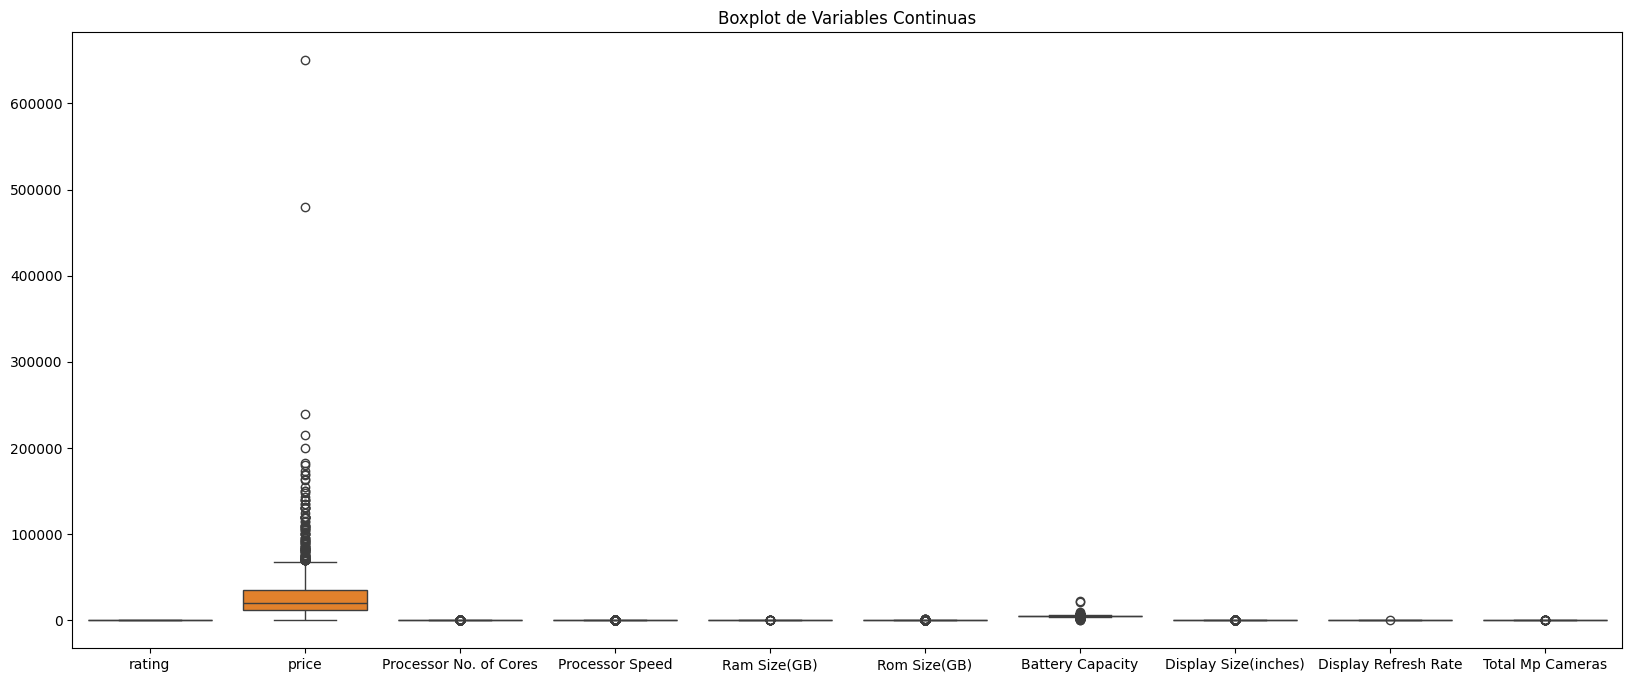

In [75]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_corregido[continuous_columns])
plt.title('Boxplot de Variables Continuas')
plt.show()

Veamos algunas variables de manera individualizada. empezamos por 'price'

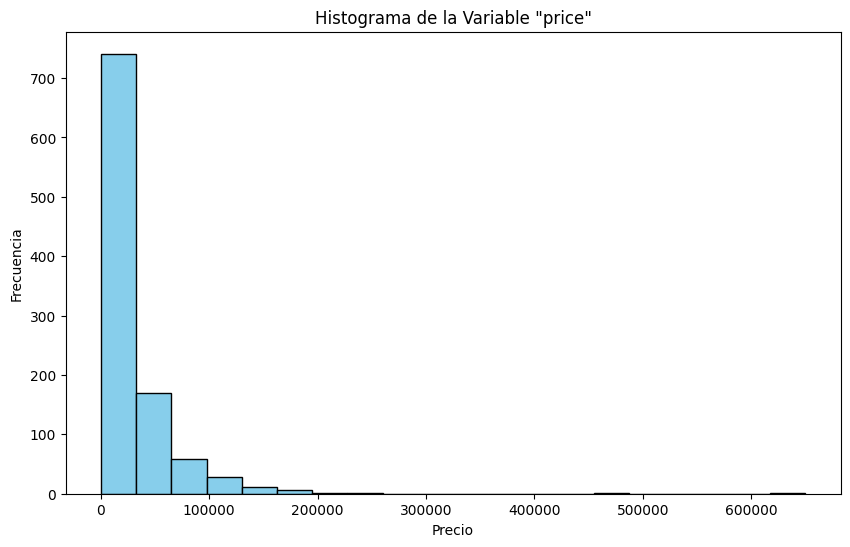

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(df_corregido['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable "price"')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [77]:
# Rango intercuartílico para la variable 'price'
Q1 = df_corregido['price'].quantile(0.25)
Q3 = df_corregido['price'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 6 * IQR

In [78]:
df_corregido[(df_corregido['price'] > limite_superior)].describe()

,rating,price,Processor No. of Cores,Processor Speed,Ram Size(GB),Rom Size(GB),Battery Capacity,Display Size(inches),Display Refresh Rate,External Card Support,3G,4G,5G,Vo5G,Single Sim,Dual Sim,VoLTE,IR Blaster,Wi-Fi,NFC,Total Mp Cameras
count,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.0,8.0,8.000000,8.0,8.000000,8.000000,8.000000,8.00000,8.0,8.000000,8.000000
mean,78.666667,290109.625000,7.250000,2.617500,7.500000,607.000000,3925.000000,6.472500,90.000000,0.25000,1.0,1.0,0.625000,0.0,0.125000,0.875000,0.875000,0.25000,1.0,0.875000,76.375000
std,9.244818,176953.893132,1.035098,0.598707,3.338092,360.252293,805.459762,0.891303,32.071349,0.46291,0.0,0.0,0.517549,0.0,0.353553,0.353553,0.353553,0.46291,0.0,0.353553,33.045153
min,62.000000,172999.000000,6.000000,1.500000,2.000000,64.000000,2275.000000,4.700000,60.000000,0.00000,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,14.000000
25%,77.250000,182224.250000,6.000000,2.200000,6.000000,448.000000,3800.000000,6.317500,60.000000,0.00000,1.0,1.0,0.000000,0.0,0.000000,1.000000,1.000000,0.00000,1.0,1.000000,66.000000
50%,79.500000,207490.000000,8.000000,2.830000,7.000000,512.000000,4186.500000,6.615000,90.000000,0.00000,1.0,1.0,1.000000,0.0,0.000000,1.000000,1.000000,0.00000,1.0,1.000000,84.000000
75%,84.750000,299999.250000,8.000000,3.020000,9.000000,1000.000000,4389.000000,6.710000,120.000000,0.25000,1.0,1.0,1.000000,0.0,0.000000,1.000000,1.000000,0.25000,1.0,1.000000,90.750000
max,88.000000,650000.000000,8.000000,3.220000,12.000000,1000.000000,4700.000000,7.920000,120.000000,1.00000,1.0,1.0,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,124.000000


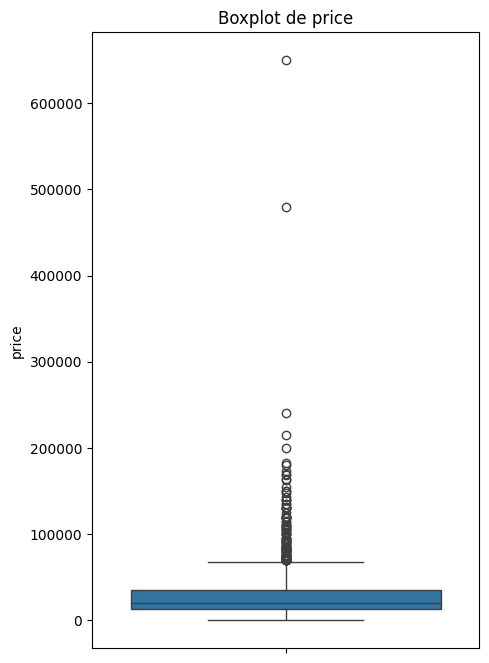

In [79]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['price'])
plt.title('Boxplot de price')
plt.show()

En vez de eliminar utliers de la variable 'price' y uesto que su distribución parece ser logarítmica, vamos a transformar esta columna en otra cuyos valores sean el logaritmo natural
de 'price'

In [80]:
df_corregido['log_price'] = np.log(df_corregido['price'])

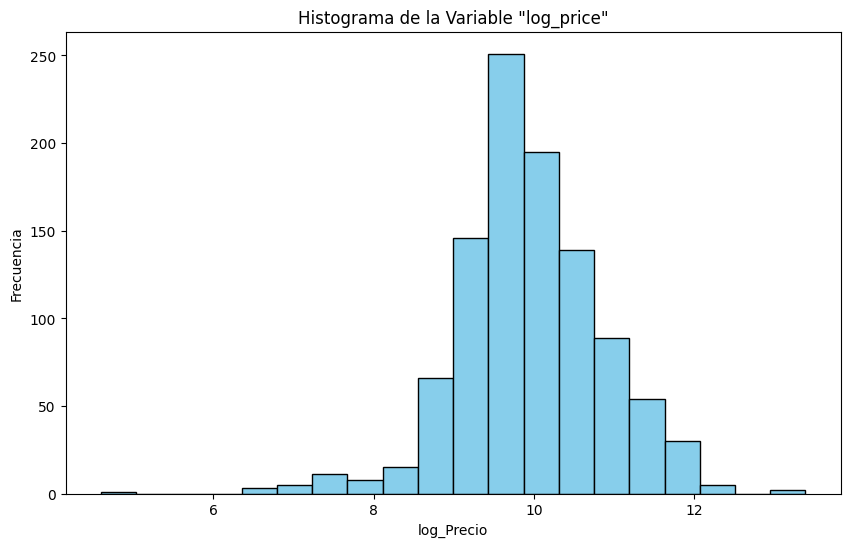

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(df_corregido['log_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable "log_price"')
plt.xlabel('log_Precio')
plt.ylabel('Frecuencia')
plt.show()

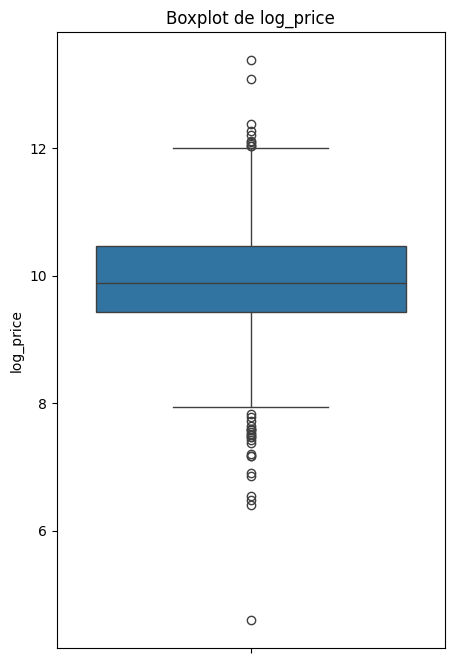

In [82]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['log_price'])
plt.title('Boxplot de log_price')
plt.show()

Hemos convertido la columna en una distribución que se asemeja a una normal y los ouliers no son ya tan pronunciados. No cambiamos nada.

Veamos ahora la variable 'Battery Capacity'

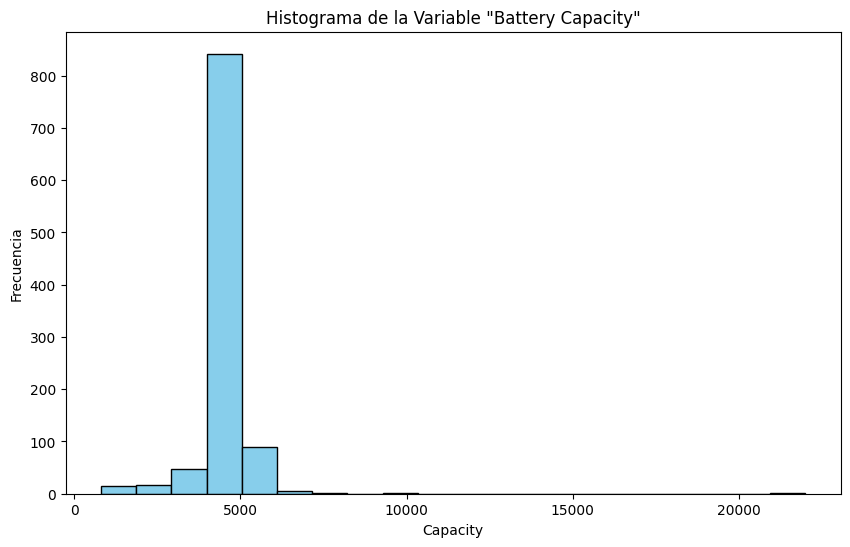

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df_corregido['Battery Capacity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable "Battery Capacity"')
plt.xlabel('Capacity')
plt.ylabel('Frecuencia')
plt.show()

In [84]:
Q1 = df_corregido['Battery Capacity'].quantile(0.25)
Q3 = df_corregido['Battery Capacity'].quantile(0.75)
IQR_BC = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR_BC

In [85]:
(df_corregido['Battery Capacity'] > limite_superior).describe()

count      1020
unique        2
top       False
freq        950
Name: Battery Capacity, dtype: object

In [86]:
df_corregido.loc[df_corregido['Battery Capacity'] > limite_superior, 'Battery Capacity'] = limite_superior

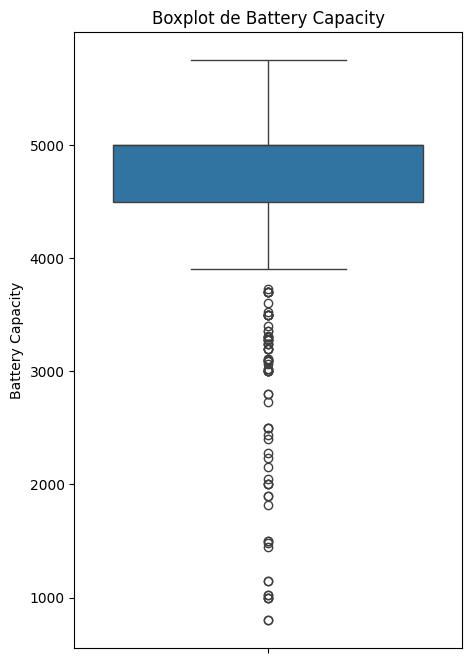

In [87]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Battery Capacity'])
plt.title('Boxplot de Battery Capacity')
plt.show()

Tiene outliers por debajo, pero lo vamos a mantener, ya que es factible que la capacidad de la batería de los modelos antiguos o más baratos sea muy baja.

Veamos ahora 'Rom Size(GB)'

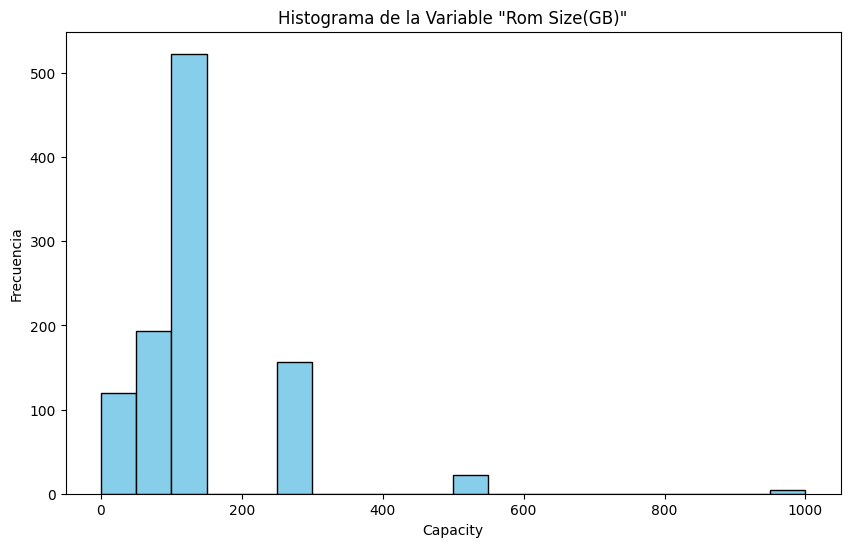

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(df_corregido['Rom Size(GB)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable "Rom Size(GB)"')
plt.xlabel('Capacity')
plt.ylabel('Frecuencia')
plt.show()

In [89]:
Q1 = df_corregido['Rom Size(GB)'].quantile(0.25)
Q3 = df_corregido['Rom Size(GB)'].quantile(0.75)
IQR_RS = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR_RS

In [90]:
(df_corregido['Rom Size(GB)'] > limite_superior).describe()

count      1020
unique        2
top       False
freq        836
Name: Rom Size(GB), dtype: object

In [91]:
df_corregido.loc[df_corregido['Rom Size(GB)'] > limite_superior, 'Rom Size(GB)'] = limite_superior

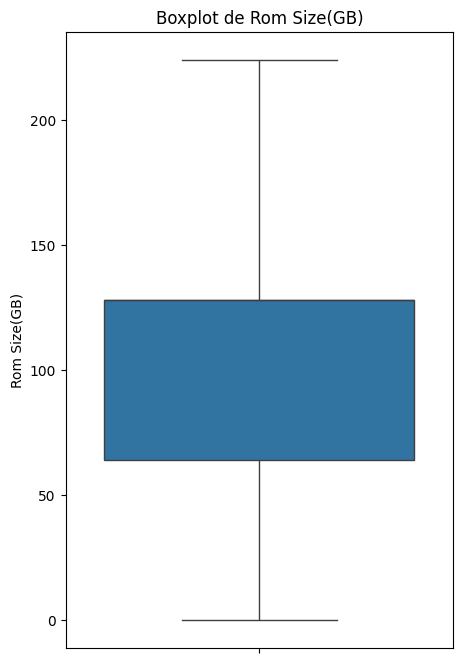

In [92]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Rom Size(GB)'])
plt.title('Boxplot de Rom Size(GB)')
plt.show()

Vamos ahora con la tasa de refresco de la pantalla.

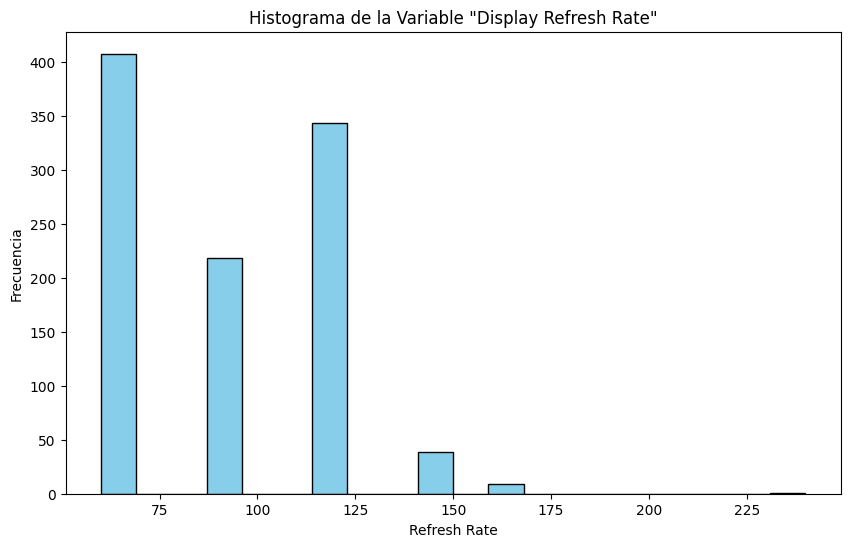

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(df_corregido['Display Refresh Rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable "Display Refresh Rate"')
plt.xlabel('Refresh Rate')
plt.ylabel('Frecuencia')
plt.show()

In [94]:
Q1 = df_corregido['Display Refresh Rate'].quantile(0.25)
Q3 = df_corregido['Display Refresh Rate'].quantile(0.75)
IQR_DRR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR_DRR

In [95]:
df_corregido.loc[df_corregido['Display Refresh Rate'] > limite_superior, 'Rom Size(GB)'] = limite_superior

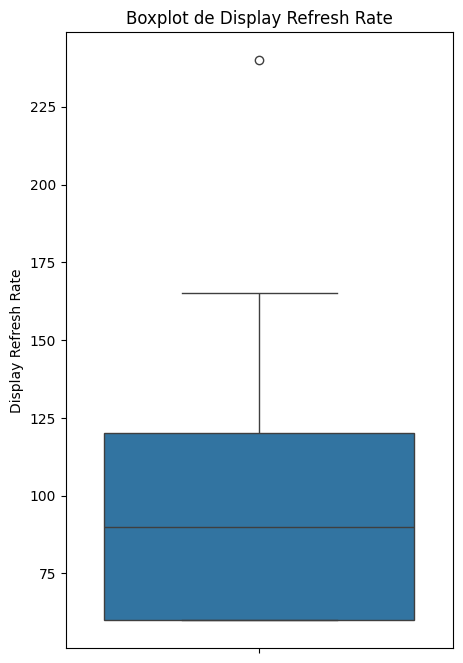

In [96]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Display Refresh Rate'])
plt.title('Boxplot de Display Refresh Rate')
plt.show()

Veamos ahora los valores de la columna 'rating'

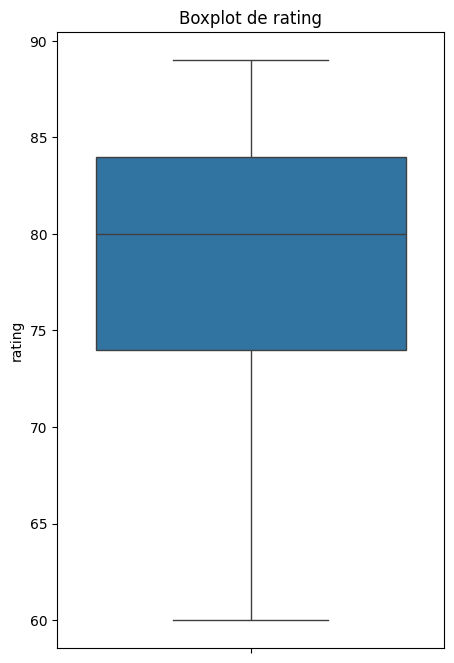

In [97]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['rating'])
plt.title('Boxplot de rating')
plt.show()

Y del número de Cores del procesador

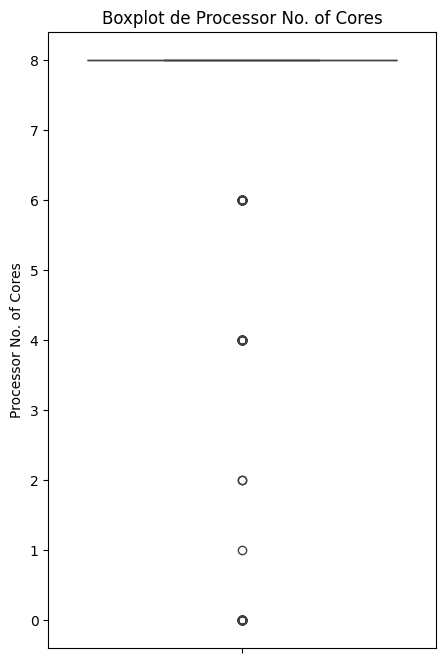

In [98]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Processor No. of Cores'])
plt.title('Boxplot de Processor No. of Cores')
plt.show()

No los cambiamos, ya que existen modelos con menor número de 'cores' en el procesador.

Velocidad del procesador

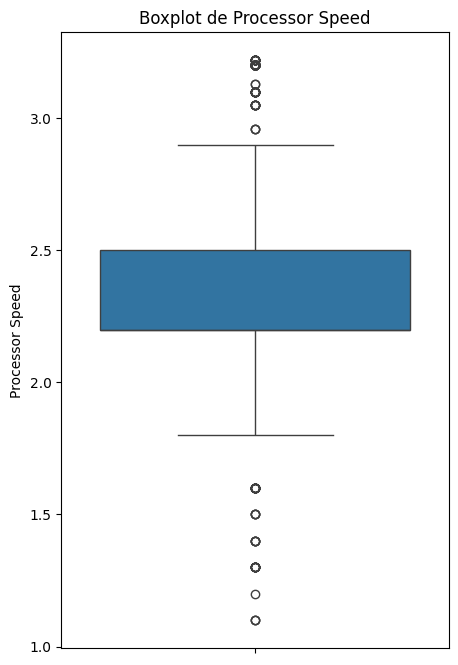

In [99]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Processor Speed'])
plt.title('Boxplot de Processor Speed')
plt.show()

Tampoco cambiamos nada. Los valores son verosímiles.

Memoria RAM

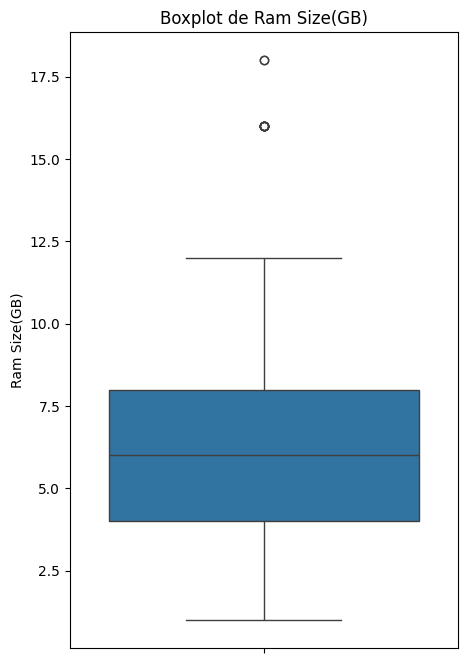

In [100]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Ram Size(GB)'])
plt.title('Boxplot de Ram Size(GB)')
plt.show()

Igual. Estos valores son verosímiles.

Tamaño de la pantalla.

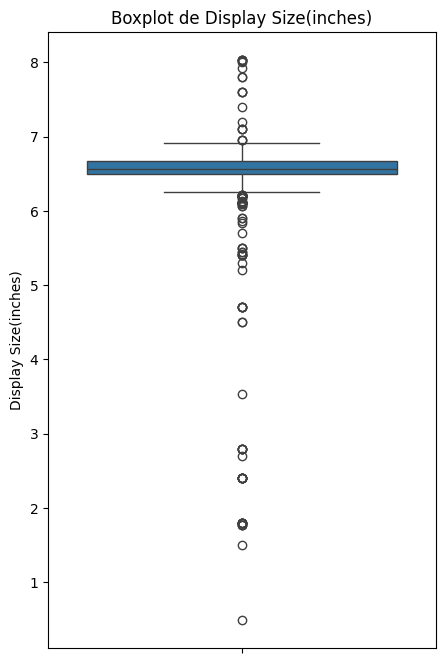

In [101]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Display Size(inches)'])
plt.title('Boxplot de Display Size(inches)')
plt.show()

También me parecen verosímiles. los modelos más baratos y antiguos pueden no tener pantalla, o ser muy pequeña.

Total de megapixels.

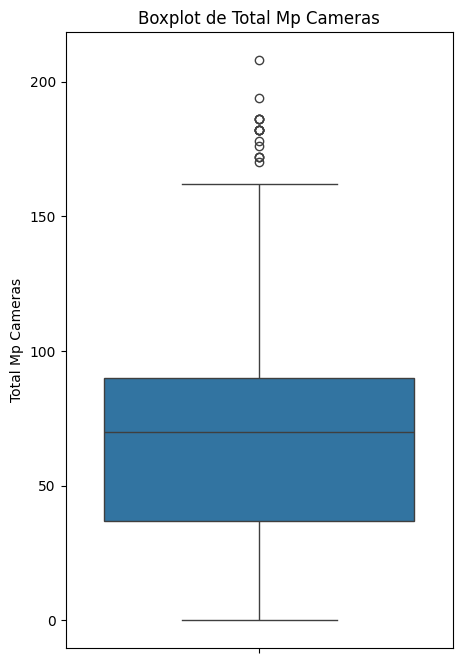

In [102]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_corregido['Total Mp Cameras'])
plt.title('Boxplot de Total Mp Cameras')
plt.show()

Tampoco cambiamos nada.

In [103]:
df_corregido.to_csv('src/data/process/smartphones_corregido_sin_outliers.csv', index=True)

## Test de Hipótesis ##

Vamos a ver la relación y aplicar test de hipótesis a cada una de las variables que tenemos y ver si la incidencia en la variable 'rating'.

* A las variables continuas vamos a aplicarle la prueba de Welch, 
* A las discretas o categóricas con dos valores le aplicaremos el One-Way ANOVA
* Al resto de variables categóricas le aplicamos el test de Krustal-Wallis

Antes de continuar, dividimos el dataset entre los que tienen Nan en la columna rating y los que no

In [104]:
df_rating_con_nan = df_corregido[df_corregido['rating'].isna()]

In [105]:
df_rating_sin_nan = df_corregido[~df_corregido['rating'].isna()]

In [106]:
df_rating_con_nan.to_csv('src/data/process/smartphones_rating_con_nan.csv', index=True)
df_rating_sin_nan.to_csv('src/data/process/smartphones_rating_sin_nan.csv', index=True)

Test de Welch a los valores continuos con respecto a la columna rating sin Nan

In [107]:
columnas_continuas = ['price', 'log_price', 'Processor Speed', 'Battery Capacity', 'Display Size(inches)', 'Total Mp Cameras']
columnas_discretas_categoricas_2_grupos = [ 'External Card Support',  
                                           '3G', '4G', '5G', 'Vo5G', 'Single Sim', 'Dual Sim', 'VoLTE', 'IR Blaster', 'Wi-Fi', 'NFC']

columnas_discretas_categoricas_mas_de_2_grupos = ['Brand', 'os', 'Processor No. of Cores', 'Ram Size(GB)', 'Rom Size(GB)', 'Display Refresh Rate']

In [108]:
for col in columnas_continuas:
    _, p_value = ttest_ind(df_rating_sin_nan[col], df_rating_sin_nan['rating'], equal_var=False)
    
    # Imprimir el resultado
    print(f'Test de Welch entre {col} y rating: p-value = {p_value}')
    
    # Puedes agregar lógica para interpretar el p-value y tomar decisiones basadas en él
    if p_value < 0.05:
        print('Diferencia significativa')
    else:
        print('No hay diferencia significativa')
    print('-' * 40)

Test de Welch entre price y rating: p-value = 2.5380007303028118e-95
Diferencia significativa
----------------------------------------
Test de Welch entre log_price y rating: p-value = 0.0
Diferencia significativa
----------------------------------------
Test de Welch entre Processor Speed y rating: p-value = 0.0
Diferencia significativa
----------------------------------------
Test de Welch entre Battery Capacity y rating: p-value = 0.0
Diferencia significativa
----------------------------------------
Test de Welch entre Display Size(inches) y rating: p-value = 0.0
Diferencia significativa
----------------------------------------
Test de Welch entre Total Mp Cameras y rating: p-value = 4.8196969691119786e-12
Diferencia significativa
----------------------------------------


Todas las variables tienen una incidencia significativa en el valor de 'rating'

Veamos si la variable 'rating' sigue una distribución normal

In [109]:
statistic, p_value = shapiro(df_rating_sin_nan['rating'])

# Imprimir el resultado
print(f'Estadístico W: {statistic}')
print(f'Valor p: {p_value}')

# Decidir si los datos siguen una distribución normal
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")

Estadístico W: 0.940301239490509
Valor p: 2.6083517274907592e-18
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


Aplicamos el test One-Way ANOVA a las columnas que pueden dividirse en 2 grupos

In [110]:
for col in columnas_discretas_categoricas_2_grupos:
    groups = [df_rating_sin_nan[df_rating_sin_nan['rating'] == rating][col] for rating in df_rating_sin_nan['rating'].unique()]
    
    # Realizar el test de One-Way ANOVA
    statistic, p_value = f_oneway(*groups)
    
    # Imprimir el resultado
    print(f'Test One-Way ANOVA entre {col} y rating: Estadístico F = {statistic}, p-value = {p_value}')
    
    # Puedes agregar lógica para interpretar el p-value y tomar decisiones basadas en él
    alpha = 0.05
    if p_value < alpha:
        print('Hay diferencias significativas entre los grupos.')
    else:
        print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')
    print('-' * 40)

Test One-Way ANOVA entre External Card Support y rating: Estadístico F = 1.481514218773789, p-value = 0.04982276538412948
Hay diferencias significativas entre los grupos.
----------------------------------------
Test One-Way ANOVA entre 3G y rating: Estadístico F = nan, p-value = nan
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.
----------------------------------------
Test One-Way ANOVA entre 4G y rating: Estadístico F = nan, p-value = nan
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.
----------------------------------------
Test One-Way ANOVA entre 5G y rating: Estadístico F = 18.702551367668264, p-value = 4.3640956048789593e-72
Hay diferencias significativas entre los grupos.
----------------------------------------
Test One-Way ANOVA entre Vo5G y rating: Estadístico F = 1.0703722784248275, p-value = 0.3669024116594404
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.


c:\Users\manue\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Las variables 'External Card Support', '5G', 'IR Blaster' y 'NFC' tienen incidencia significativa en la variable 'rating'. El resto de las lista no.

Aplicamos el test de Kruskal-Wallis H a las variables categóricas que pueden dividirse en 3 o más grupos

In [111]:
for col in columnas_discretas_categoricas_mas_de_2_grupos:
    groups = [df_rating_sin_nan[df_rating_sin_nan['rating'] == rating][col] for rating in df_rating_sin_nan['rating'].unique()]
    
    # Realizar el test de Kruskal-Wallis
    statistic, p_value = kruskal(*groups)
    
    # Imprimir el resultado
    print(f'Test Kruskal-Wallis entre {col} y rating: Estadístico H = {statistic}, p-value = {p_value}')
    
    # Puedes agregar lógica para interpretar el p-value y tomar decisiones basadas en él
    alpha = 0.05
    if p_value < alpha:
        print('Hay diferencias significativas entre los grupos.')
    else:
        print('No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.')

Test Kruskal-Wallis entre Brand y rating: Estadístico H = 21.004241121671868, p-value = 0.8589948561773523
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.
Test Kruskal-Wallis entre os y rating: Estadístico H = 22.615553184507725, p-value = 0.7938357781577527
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.
Test Kruskal-Wallis entre Processor No. of Cores y rating: Estadístico H = 89.54338174249249, p-value = 4.2790563274478054e-08
Hay diferencias significativas entre los grupos.
Test Kruskal-Wallis entre Ram Size(GB) y rating: Estadístico H = 623.3265715378817, p-value = 9.264232600211187e-113
Hay diferencias significativas entre los grupos.
Test Kruskal-Wallis entre Rom Size(GB) y rating: Estadístico H = 505.8868589644225, p-value = 1.7747282710890234e-88
Hay diferencias significativas entre los grupos.
Test Kruskal-Wallis entre Display Refresh Rate y rating: Estadístico H = 354.27920812888175, p-value = 1.2366

'Processor No. of Cores', 'Ram Size(GB)', 'Rom Size(GB)' y 'Display Refresh Rate' tienen influencia significativa sobre la variable 'rating'

Nos vamos a quedar con las columnas que tienen incidencia con la variable 'rating'.

In [112]:
columnas_modelo_variables = ['log_price', 'Processor Speed', 'Battery Capacity', 'Display Size(inches)', 'Total Mp Cameras']

columnas_modelo_discretas_2_grupos = [ 'External Card Support', '5G', 'IR Blaster', 'NFC']

columnas_discretas_categoricas_mas_de_2_grupos = ['Processor No. of Cores', 'Ram Size(GB)', 'Rom Size(GB)', 'Display Refresh Rate']

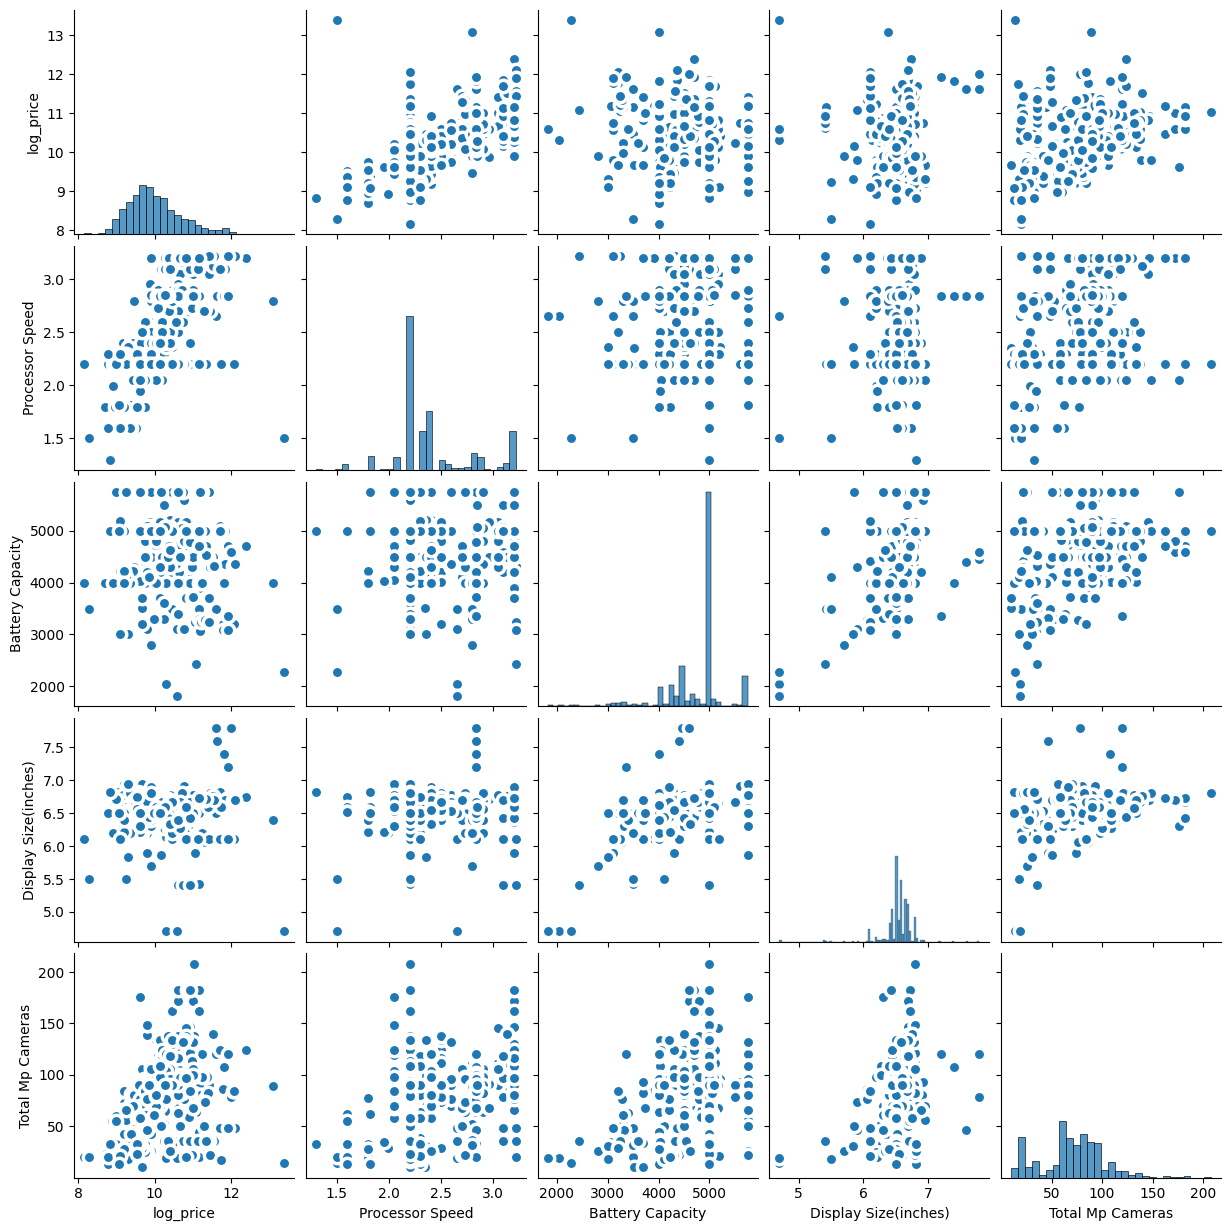

In [113]:
sns.pairplot(df_rating_sin_nan[columnas_modelo_variables], kind='scatter', dropna=True,
             plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

In [114]:
df_rating_sin_nan[columnas_modelo_variables].corr()

,log_price,Processor Speed,Battery Capacity,Display Size(inches),Total Mp Cameras
log_price,1.000000,0.592565,-0.393215,-0.001553,0.451680
Processor Speed,0.592565,1.000000,-0.176589,0.087146,0.282760
Battery Capacity,-0.393215,-0.176589,1.000000,0.452939,0.031775
Display Size(inches),-0.001553,0.087146,0.452939,1.000000,0.308597
Total Mp Cameras,0.451680,0.282760,0.031775,0.308597,1.000000


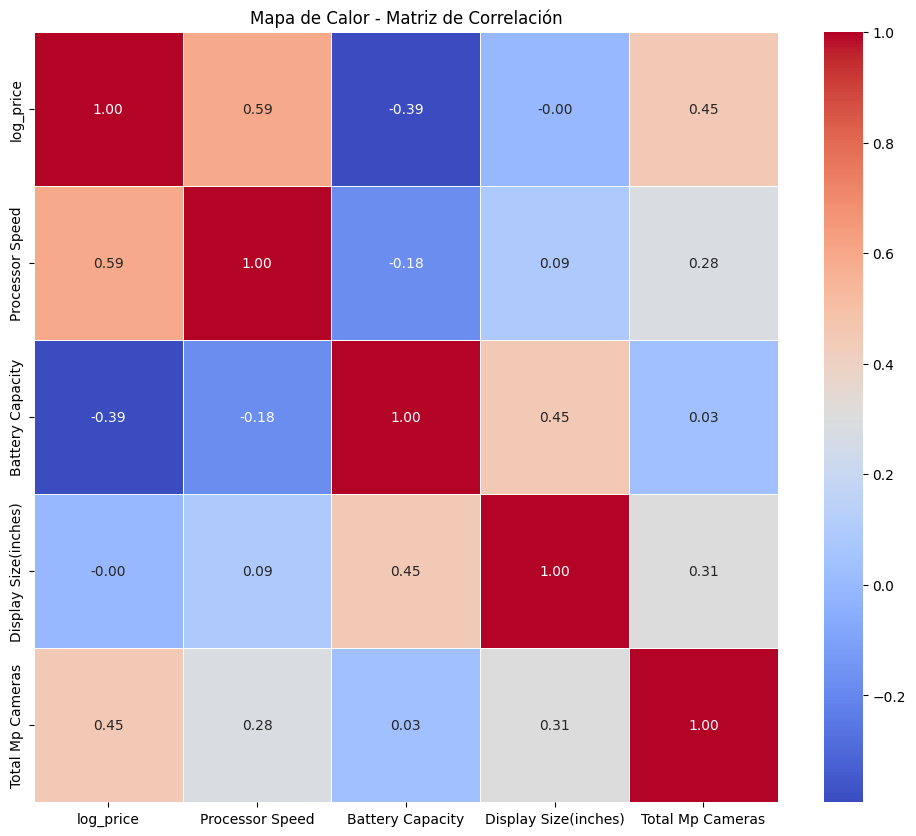

In [115]:
# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(df_rating_sin_nan[columnas_modelo_variables].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

No hay una fuerte colinealidad entre las variables continuas

Vamos a aplicar statsmodel para tratar de imputar los valores Nan de la columna 'rating', pero antes, tenemos que cambiar los nombres a las columnas, ya que la funcion ols() no admite varaibles que contienen espacios, que empiezan por número o que tienen caracteres extraños

In [116]:
# Crear un diccionario de mapeo para renombrar las columnas
nuevos_nombres = {col: col.replace(" ", "") for col in df_rating_sin_nan.columns}

# Renombrar las columnas usando el diccionario de mapeo
df_rating_sin_nan.rename(columns=nuevos_nombres, inplace=True)

df_rating_sin_nan.rename(columns={'ProcessorNo.ofCores': 'ProcessorNoCores', '5G': 'G5', 'RamSize(GB)': 'RamSize', 'RomSize(GB)': 'RomSize',
                                  'DisplaySize(inches)':'DisplaySize'}, inplace=True)


# Imprimir el DataFrame con las columnas renombradas
df_rating_sin_nan.columns

C:\Users\manue\AppData\Local\Temp\ipykernel_19892\1684490600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_sin_nan.rename(columns=nuevos_nombres, inplace=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_19892\1684490600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_sin_nan.rename(columns={'ProcessorNo.ofCores': 'ProcessorNoCores', '5G': 'G5', 'RamSize(GB)': 'RamSize', 'RomSize(GB)': 'RomSize',


Index(['model', 'Brand', 'os', 'rating', 'price', 'ProcessorName',
       'ProcessorNoCores', 'ProcessorSpeed', 'RamSize', 'RomSize',
       'BatteryCapacity', 'DisplaySize', 'DisplayRefreshRate',
       'ExternalCardSupport', '3G', '4G', 'G5', 'Vo5G', 'SingleSim', 'DualSim',
       'VoLTE', 'IRBlaster', 'Wi-Fi', 'NFC', 'TotalMpCameras', 'log_price'],
      dtype='object')

In [117]:
# Crear un diccionario de mapeo para renombrar las columnas
nuevos_nombres = {col: col.replace(" ", "") for col in df_rating_con_nan.columns}

# Renombrar las columnas usando el diccionario de mapeo
df_rating_con_nan.rename(columns=nuevos_nombres, inplace=True)
df_rating_con_nan.rename(columns={'ProcessorNo.ofCores': 'ProcessorNoCores', '5G': 'G5', 'RamSize(GB)': 'RamSize', 'RomSize(GB)': 'RomSize',
                                  'DisplaySize(inches)':'DisplaySize'}, inplace=True)

# Imprimir el DataFrame con las columnas renombradas
df_rating_con_nan.columns

C:\Users\manue\AppData\Local\Temp\ipykernel_19892\2633127325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_con_nan.rename(columns=nuevos_nombres, inplace=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_19892\2633127325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_con_nan.rename(columns={'ProcessorNo.ofCores': 'ProcessorNoCores', '5G': 'G5', 'RamSize(GB)': 'RamSize', 'RomSize(GB)': 'RomSize',


Index(['model', 'Brand', 'os', 'rating', 'price', 'ProcessorName',
       'ProcessorNoCores', 'ProcessorSpeed', 'RamSize', 'RomSize',
       'BatteryCapacity', 'DisplaySize', 'DisplayRefreshRate',
       'ExternalCardSupport', '3G', '4G', 'G5', 'Vo5G', 'SingleSim', 'DualSim',
       'VoLTE', 'IRBlaster', 'Wi-Fi', 'NFC', 'TotalMpCameras', 'log_price'],
      dtype='object')

In [118]:
df_rating_con_nan.to_csv('src/data/process/smartphones_rating_con_nan.csv', index=True)
df_rating_sin_nan.to_csv('src/data/process/smartphones_rating_sin_nan.csv', index=True)

In [119]:
ols_formula = 'rating ~ C(ExternalCardSupport) + C(IRBlaster) + C(G5) + C(NFC) + C(ProcessorNoCores) + C(RamSize) + C(RomSize) + log_price + ProcessorSpeed + BatteryCapacity + DisplaySize + TotalMpCameras'

In [120]:
OLS = ols(formula=ols_formula, data=df_rating_sin_nan)

In [121]:
model = OLS.fit()

In [122]:
model_results = model.summary()

In [123]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     258.9
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:52:19   Log-Likelihood:                -2094.5
No. Observations:                 879   AIC:                             4237.
Df Residuals:                     855   BIC:                             4352.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      30.1500      4.094      7.364      0.000      22.115      38.185
C(ExternalCardSupport)[T.1]     1.3040      0.333      3.912      0.000       0.650       1.958
C(IRBlaster)[T.1.0]             1.1269      0.255      4.420      0.000       0.626       1.627
C(G5)[T.1.0]                    0.9654      0.241      4.014      0.000       0.493       1.437
C(NFC)[T.1.0]                   0.9989      0.249      4.014      0.000       0.510       1.487
C(ProcessorNoCores)[T.4]        2.4841      1.482      1.676      0.094      -0.424       5.393
C(ProcessorNoCores)[T.6]        4.9609      1.208      4.107      0.000       2.590       7.332
C(ProcessorNoCores)[T.8]        6.9812      1.177      5.933      0.000       4.672       9.291
C(RamSize)[T.3.0]               1.6101      0.875      1.841      0.066      -0.107       3.327
C(RamSize)[T.4.0]               4.8526      0.956      5.077      0.000       2.977       6.729
C(RamSize)[T.6.0]               7.9259      1.001      7.920      0.000       5.962       9.890
C(RamSize)[T.8.0]               9.4510      1.024      9.229      0.000       7.441      11.461
C(RamSize)[T.12.0]              9.3910      1.142      8.227      0.000       7.150      11.632
C(RamSize)[T.16.0]              8.7211      1.438      6.064      0.000       5.898      11.544
C(RamSize)[T.18.0]              9.5141      2.208      4.308      0.000       5.180      13.848
C(RomSize)[T.64.0]              1.3504      0.696      1.940      0.053      -0.016       2.717
C(RomSize)[T.128.0]             3.2400      0.768      4.221      0.000       1.733       4.746
C(RomSize)[T.210.0]            12.3394      2.893      4.265      0.000       6.661      18.018
C(RomSize)[T.224.0]             4.3262      0.857      5.047      0.000       2.644       6.009
log_price                       1.2748      0.283      4.506      0.000       0.720       1.830
ProcessorSpeed                  2.9030      0.321      9.053      0.000       2.274       3.532
BatteryCapacity                -0.0005      0.000     -2.161      0.031      -0.001   -4.29e-05
DisplaySize                     1.0214      0.494      2.068      0.039       0.052       1.991
TotalMpCameras                  0.0660      0.004     15.852      0.000       0.058       0.074
==============================================================================
Omnibus:                      202.204   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.971
Skew:                          -1.145   Prob(JB):                    1.90e-126
Kurtosis:                       6.250   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Stand

El modelo parece explicar bien el valor de la variable 'rating'

Vamos a comprobar la linearidad con las variables continuas

In [124]:
variables_continuas = ['log_price', 'ProcessorSpeed', 'BatteryCapacity', 'DisplaySize', 'TotalMpCameras']

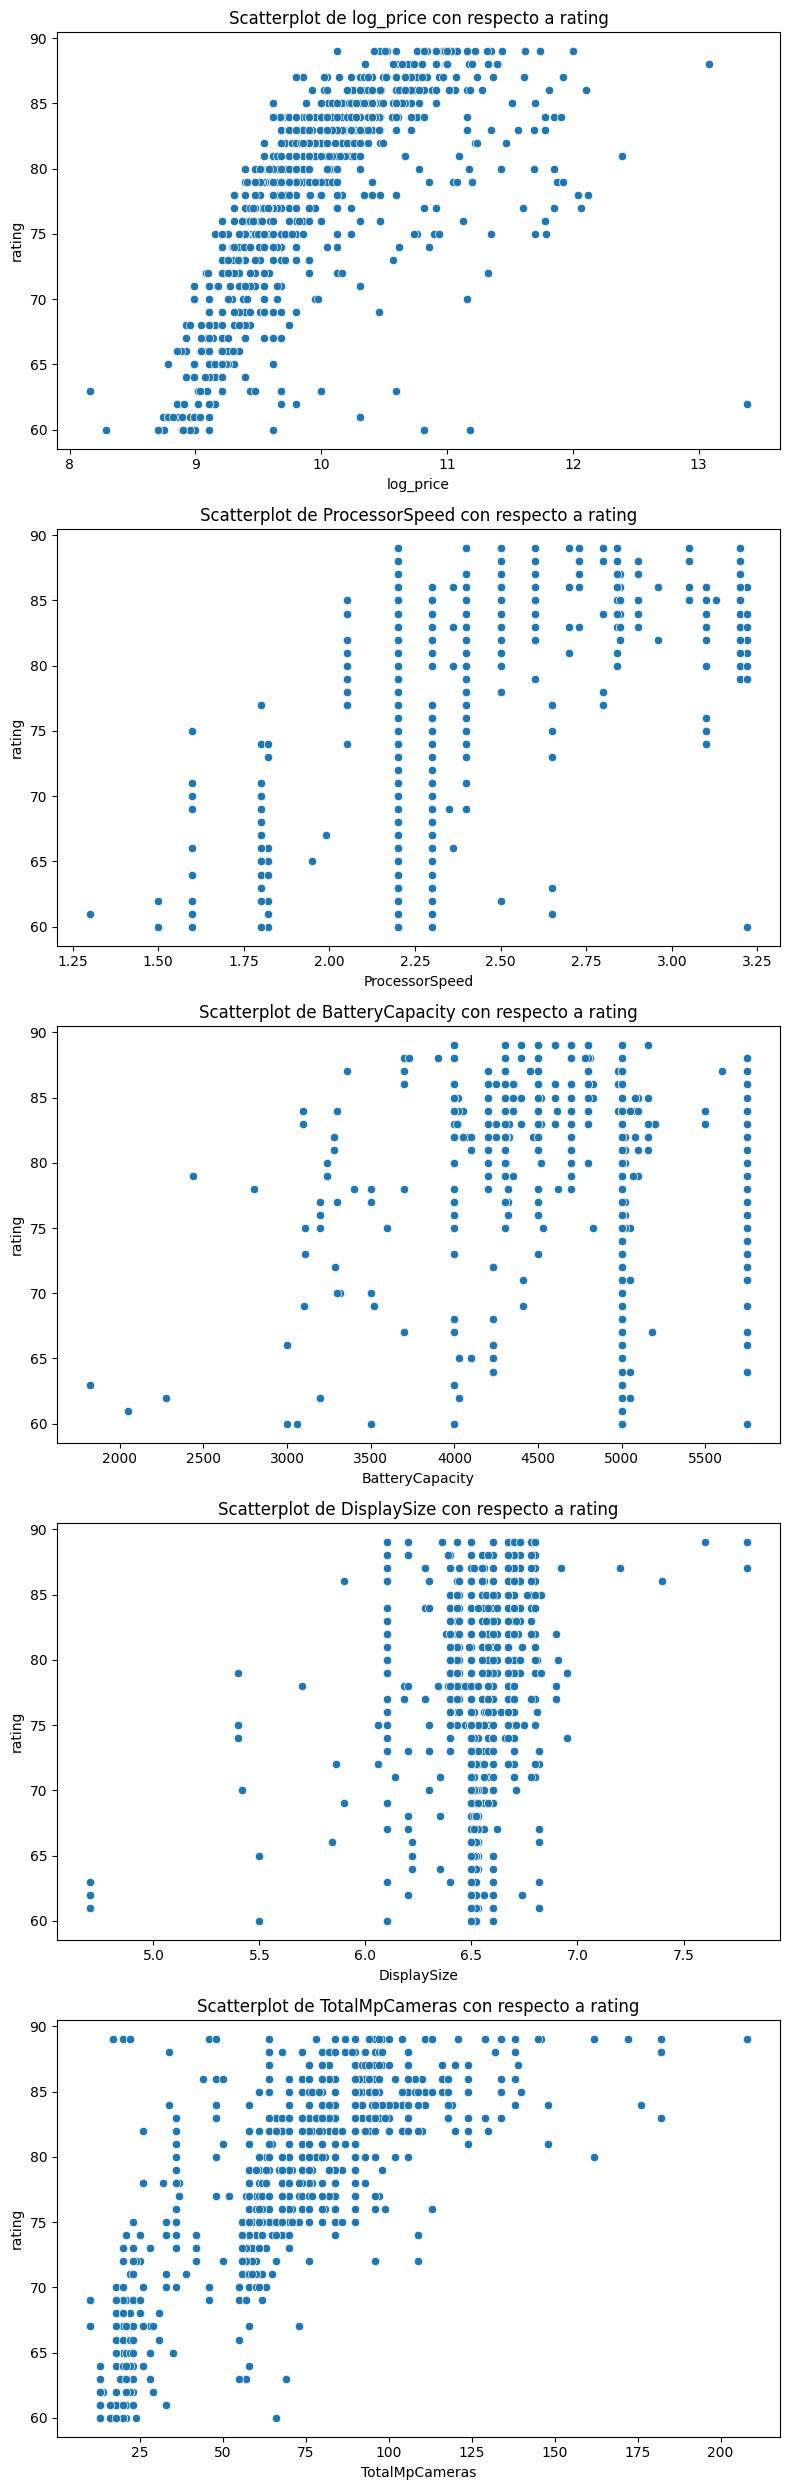

In [125]:
# Crear subplots para cada variable continua
fig, axes = plt.subplots(nrows=len(variables_continuas), figsize=(8, 5 * len(variables_continuas)))

# Iterar sobre cada variable y crear scatterplot con respecto a 'rating'
for i, variable in enumerate(variables_continuas):
    sns.scatterplot(x=variable, y='rating', data=df_rating_sin_nan, ax=axes[i])
    axes[i].set_title(f'Scatterplot de {variable} con respecto a rating')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('rating')

plt.tight_layout()
plt.show()

Veamos si los residuos siguen una distribución normal

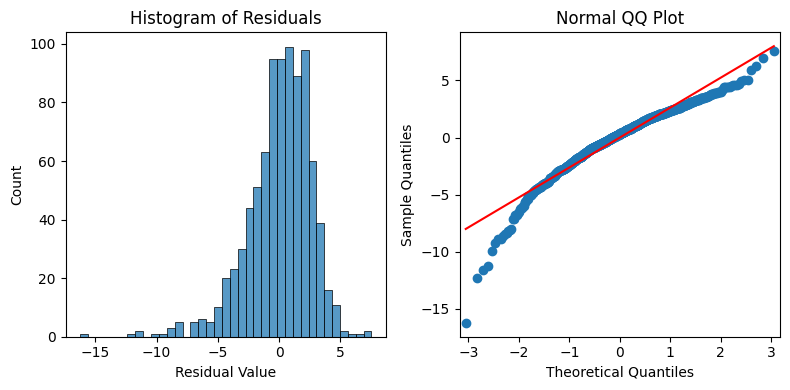

In [126]:

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

Finalmente comprobemos que la varianza de lso residuos es constante.

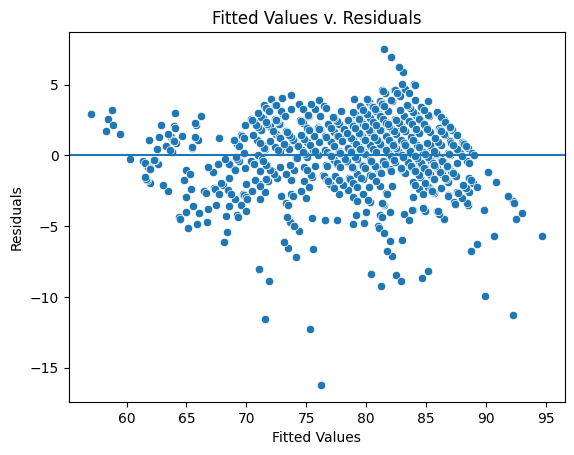

In [127]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

Parece que el modelo cumple las premisas y explica bien los valores de 'rating', ya solo nos quedaría aplicarlo a la columna 'rating' del dataframe que contiene los valores NaN
para sustituir estos valores

Hemos creado una función de regresión múltiple que parece explicar ampliamente el valor de la columna 'rating'

In [128]:
def regresion_multiple(df):
    # Selecciona las variables independientes y la variable dependiente
    X = df[['ExternalCardSupport', 'IRBlaster', 'G5', 'NFC', 'ProcessorNoCores', 'RamSize', 'RomSize', 'log_price', 'ProcessorSpeed', 'BatteryCapacity', 'DisplaySize', 'TotalMpCameras']]
    y = df['rating']

    # Añade una columna de intercepto
    X = sm.add_constant(X)

    # Ajusta el modelo OLS
    modelo_ols = sm.OLS(y, X).fit()

    # Muestra los resultados del modelo
    print(modelo_ols.summary())

    return modelo_ols

# Aplica la función al DataFrame original
modelo_original = regresion_multiple(df_rating_sin_nan)

# Aplica el modelo a un nuevo DataFrame (df2)
# Asegúrate de que las variables en df2 tengan los mismos nombres y tipos que en df1
variables_independientes_df2 = df_rating_con_nan[['ExternalCardSupport', 'IRBlaster', 'G5', 'NFC', 'ProcessorNoCores', 'RamSize', 'RomSize', 'log_price', 'ProcessorSpeed', 'BatteryCapacity', 'DisplaySize', 'TotalMpCameras']]
variables_independientes_df2 = sm.add_constant(variables_independientes_df2)
predicciones_df2 = modelo_original.predict(variables_independientes_df2)

# Las predicciones ahora se encuentran en la serie 'predicciones_df2'
# Puedes añadir esta serie al DataFrame original o usarla según tus necesidades
df_rating_con_nan['rating'] = round(predicciones_df2, 2)

# Muestra el DataFrame df2 con las predicciones añadidas
print(df_rating_con_nan[['ExternalCardSupport', 'IRBlaster', 'G5', 'NFC', 'ProcessorNoCores', 'RamSize', 'RomSize', 'log_price', 'ProcessorSpeed', 'BatteryCapacity', 'DisplaySize', 'TotalMpCameras']])


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     351.1
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          1.14e-322
Time:                        21:52:20   Log-Likelihood:                -2228.9
No. Observations:                 879   AIC:                             4484.
Df Residuals:                     866   BIC:                             4546.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  26.8757    

C:\Users\manue\AppData\Local\Temp\ipykernel_19892\3072797364.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_con_nan['rating'] = round(predicciones_df2, 2)


In [129]:
df_rating_con_nan.head(10)

,model,Brand,os,rating,price,ProcessorName,ProcessorNoCores,ProcessorSpeed,RamSize,RomSize,BatteryCapacity,DisplaySize,DisplayRefreshRate,ExternalCardSupport,3G,4G,G5,Vo5G,SingleSim,DualSim,VoLTE,IRBlaster,Wi-Fi,NFC,TotalMpCameras,log_price
14,Samsung Galaxy S23 Ultra 5G,Samsung,Android,86.59,114990.0,Snapdragon 8 Gen2,8,3.20,8.0,224.0,5000.0,6.80,120,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,76.0,11.652600
29,OnePlus 11 Pro,OnePlus,Android,91.25,69999.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4500.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,146.0,11.156236
37,Samsung Galaxy S22 Ultra 5G,Samsung,Android,89.88,91999.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,5000.0,6.80,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,104.0,11.429533
49,Samsung Galaxy A74 5G,Samsung,Android,83.79,42999.0,Snapdragon 7 Gen1,8,2.36,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.668932
69,Oppo Find N Fold,Oppo,Android,91.44,99990.0,Snapdragon 8+ Gen1,8,3.20,8.0,224.0,5000.0,7.10,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,114.0,11.512825
75,Gionee G13 Pro,Gionee,Otro SO,62.85,6190.0,Tiger T310,4,2.20,4.0,32.0,3500.0,6.26,60,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,8.730690
89,Samsung Galaxy A73 5G,Samsung,Android,83.85,41999.0,Snapdragon 778G,8,2.40,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.645401
93,Vivo X90 Pro Plus 5G,Vivo,Android,87.86,73999.0,Snapdragon 8 Gen2,8,3.20,12.0,224.0,4700.0,6.78,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,35.0,11.211807
98,Vivo X Fold 5G,Vivo,Android,88.44,106990.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,4600.0,8.03,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,66.0,11.580491
105,Xiaomi 13 Pro 5G,Xiaomi,Android,89.83,58990.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4820.0,6.73,120,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,135.0,10.985123


Por último, solo nos quedaría unir los dos dataframes en uno solo

In [130]:
phones_final = pd.concat([df_rating_con_nan, df_rating_sin_nan]).reset_index(drop=True)

In [131]:
phones_final.head(10)

,model,Brand,os,rating,price,ProcessorName,ProcessorNoCores,ProcessorSpeed,RamSize,RomSize,BatteryCapacity,DisplaySize,DisplayRefreshRate,ExternalCardSupport,3G,4G,G5,Vo5G,SingleSim,DualSim,VoLTE,IRBlaster,Wi-Fi,NFC,TotalMpCameras,log_price
0,Samsung Galaxy S23 Ultra 5G,Samsung,Android,86.59,114990.0,Snapdragon 8 Gen2,8,3.20,8.0,224.0,5000.0,6.80,120,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,76.0,11.652600
1,OnePlus 11 Pro,OnePlus,Android,91.25,69999.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4500.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,146.0,11.156236
2,Samsung Galaxy S22 Ultra 5G,Samsung,Android,89.88,91999.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,5000.0,6.80,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,104.0,11.429533
3,Samsung Galaxy A74 5G,Samsung,Android,83.79,42999.0,Snapdragon 7 Gen1,8,2.36,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.668932
4,Oppo Find N Fold,Oppo,Android,91.44,99990.0,Snapdragon 8+ Gen1,8,3.20,8.0,224.0,5000.0,7.10,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,114.0,11.512825
5,Gionee G13 Pro,Gionee,Otro SO,62.85,6190.0,Tiger T310,4,2.20,4.0,32.0,3500.0,6.26,60,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,8.730690
6,Samsung Galaxy A73 5G,Samsung,Android,83.85,41999.0,Snapdragon 778G,8,2.40,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.645401
7,Vivo X90 Pro Plus 5G,Vivo,Android,87.86,73999.0,Snapdragon 8 Gen2,8,3.20,12.0,224.0,4700.0,6.78,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,35.0,11.211807
8,Vivo X Fold 5G,Vivo,Android,88.44,106990.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,4600.0,8.03,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,66.0,11.580491
9,Xiaomi 13 Pro 5G,Xiaomi,Android,89.83,58990.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4820.0,6.73,120,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,135.0,10.985123


Finalmente, podríamos añadir una columna de Precio en Euros que actualizara el valor cada día de rupias indias a euros, según el tipo de cambio diario

In [132]:
import requests

# Clave de la API de ExchangeRate-API (reemplazar con tu propia clave)
api_key = '52643299eac907802812d8bc'

# Función para obtener la tasa de cambio de INR a EUR desde ExchangeRate-API
def obtener_tasa_cambio():
    url = f'https://v6.exchangerate-api.com/v6/{api_key}/pair/INR/EUR'
    params = {'apikey': api_key}
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data['conversion_rate']
    else:
        print(f'Error al obtener la tasa de cambio. Código de estado: {response.status_code}')
        return None


# Obtener la tasa de cambio actualizada
tasa_cambio_inr_a_eur = obtener_tasa_cambio()

if tasa_cambio_inr_a_eur is not None:
    # Crear la nueva columna 'price €' aplicando la conversión
    phones_final['price €'] = round(phones_final['price'] * tasa_cambio_inr_a_eur, 2)

   
else:
    print('No se pudo obtener la tasa de cambio actualizada.')
phones_final.head(10)

,model,Brand,os,rating,price,ProcessorName,ProcessorNoCores,ProcessorSpeed,RamSize,RomSize,BatteryCapacity,DisplaySize,DisplayRefreshRate,ExternalCardSupport,3G,4G,G5,Vo5G,SingleSim,DualSim,VoLTE,IRBlaster,Wi-Fi,NFC,TotalMpCameras,log_price,price €
0,Samsung Galaxy S23 Ultra 5G,Samsung,Android,86.59,114990.0,Snapdragon 8 Gen2,8,3.20,8.0,224.0,5000.0,6.80,120,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,76.0,11.652600,1266.04
1,OnePlus 11 Pro,OnePlus,Android,91.25,69999.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4500.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,146.0,11.156236,770.69
2,Samsung Galaxy S22 Ultra 5G,Samsung,Android,89.88,91999.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,5000.0,6.80,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,104.0,11.429533,1012.91
3,Samsung Galaxy A74 5G,Samsung,Android,83.79,42999.0,Snapdragon 7 Gen1,8,2.36,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.668932,473.42
4,Oppo Find N Fold,Oppo,Android,91.44,99990.0,Snapdragon 8+ Gen1,8,3.20,8.0,224.0,5000.0,7.10,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,114.0,11.512825,1100.89
5,Gionee G13 Pro,Gionee,Otro SO,62.85,6190.0,Tiger T310,4,2.20,4.0,32.0,3500.0,6.26,60,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,8.730690,68.15
6,Samsung Galaxy A73 5G,Samsung,Android,83.85,41999.0,Snapdragon 778G,8,2.40,8.0,128.0,5000.0,6.70,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,96.0,10.645401,462.41
7,Vivo X90 Pro Plus 5G,Vivo,Android,87.86,73999.0,Snapdragon 8 Gen2,8,3.20,12.0,224.0,4700.0,6.78,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,35.0,11.211807,814.73
8,Vivo X Fold 5G,Vivo,Android,88.44,106990.0,Snapdragon 8 Gen1,8,2.20,12.0,224.0,4600.0,8.03,120,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,66.0,11.580491,1177.96
9,Xiaomi 13 Pro 5G,Xiaomi,Android,89.83,58990.0,Snapdragon 8 Gen2,8,3.20,8.0,128.0,4820.0,6.73,120,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,135.0,10.985123,649.48


In [133]:
phones_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                1020 non-null   object 
 1   Brand                1020 non-null   object 
 2   os                   1020 non-null   object 
 3   rating               1020 non-null   float64
 4   price                1020 non-null   float64
 5   ProcessorName        1020 non-null   object 
 6   ProcessorNoCores     1020 non-null   int64  
 7   ProcessorSpeed       1020 non-null   float64
 8   RamSize              1020 non-null   float64
 9   RomSize              1020 non-null   float64
 10  BatteryCapacity      1020 non-null   float64
 11  DisplaySize          1020 non-null   float64
 12  DisplayRefreshRate   1020 non-null   int64  
 13  ExternalCardSupport  1020 non-null   int32  
 14  3G                   1020 non-null   float64
 15  4G                   1020 non-null   f

In [134]:
phones_final.to_csv('src/data/final/phones_final.csv', index=True)

In [135]:
phones_final.describe()

,rating,price,ProcessorNoCores,ProcessorSpeed,RamSize,RomSize,BatteryCapacity,DisplaySize,DisplayRefreshRate,ExternalCardSupport,3G,4G,G5,Vo5G,SingleSim,DualSim,VoLTE,IRBlaster,Wi-Fi,NFC,TotalMpCameras,log_price,price €
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,77.395618,31371.767647,7.438235,2.391892,6.609804,120.452941,4704.772549,6.435618,90.991176,0.873529,0.980392,0.979412,0.538235,0.011765,0.020588,0.978431,0.963725,0.155882,0.975490,0.385294,67.904902,9.941525,345.403039
std,9.493101,39168.942590,1.755157,0.417194,2.704030,61.534473,729.569586,0.766022,29.095743,0.332542,0.138716,0.142071,0.498780,0.107878,0.142071,0.145341,0.187064,0.362922,0.154701,0.486903,36.621017,0.906359,431.250325
min,49.860000,99.000000,0.000000,1.100000,1.000000,0.000000,800.000000,0.490000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.595120,1.090000
25%,72.000000,12464.250000,8.000000,2.200000,4.000000,64.000000,4500.000000,6.500000,60.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,37.000000,9.430614,137.227500
50%,79.000000,19815.000000,8.000000,2.200000,6.000000,128.000000,5000.000000,6.560000,90.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,70.000000,9.894160,218.165000
75%,84.000000,34999.000000,8.000000,2.500000,8.000000,128.000000,5000.000000,6.670000,120.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,90.000000,10.463075,385.340000
max,99.490000,650000.000000,8.000000,3.220000,18.000000,224.000000,5750.000000,8.030000,240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,208.000000,13.384728,7156.500000


## ANAISIS UNIVARIANTE Y BIVARIANTE ##

In [136]:
columnas_continuas = ['rating','price', 'log_price', 'ProcessorSpeed', 'BatteryCapacity', 'DisplaySize', 'TotalMpCameras', 'price €']

In [137]:
columnas_discretas = ['os', 'ProcessorNoCores', 'RamSize', 'RomSize', 'DisplayRefreshRate', 'ExternalCardSupport', 
                      '3G', '4G', 'G5', 'Vo5G', 'SingleSim', 'DualSim', 'VoLTE', 'IRBlaster', 'Wi-Fi', 'NFC']

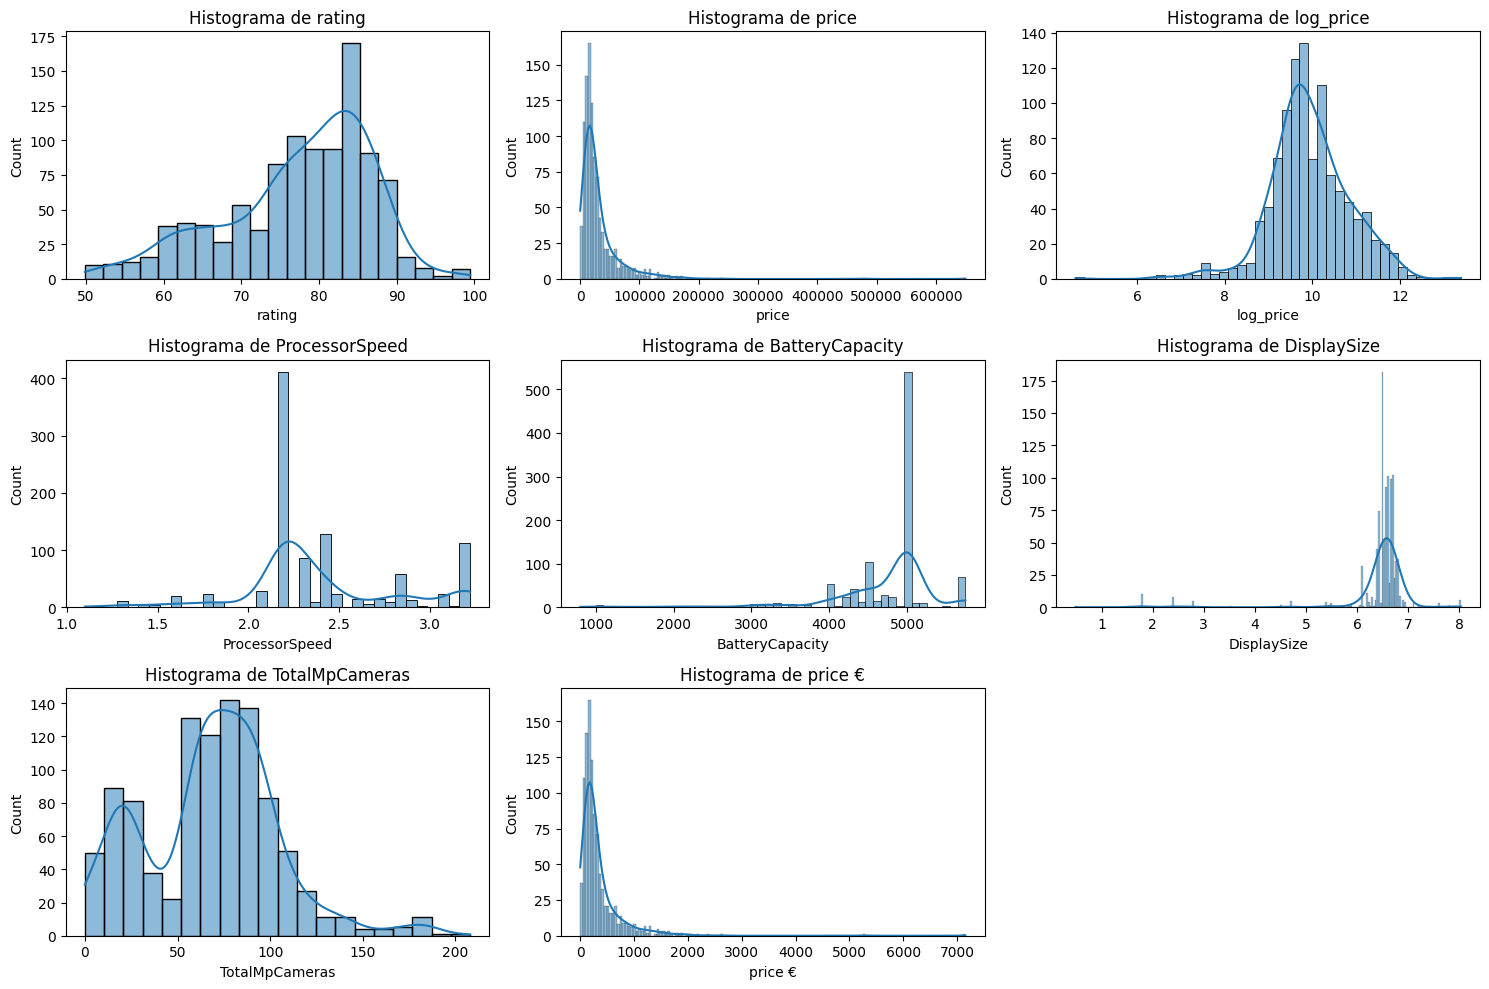

In [138]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear histogramas para cada columna continua
for i, columna in enumerate(columnas_continuas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(phones_final[columna], kde=True)
    plt.title(f'Histograma de {columna}')

# Ajustes de diseño
plt.tight_layout()
plt.show()

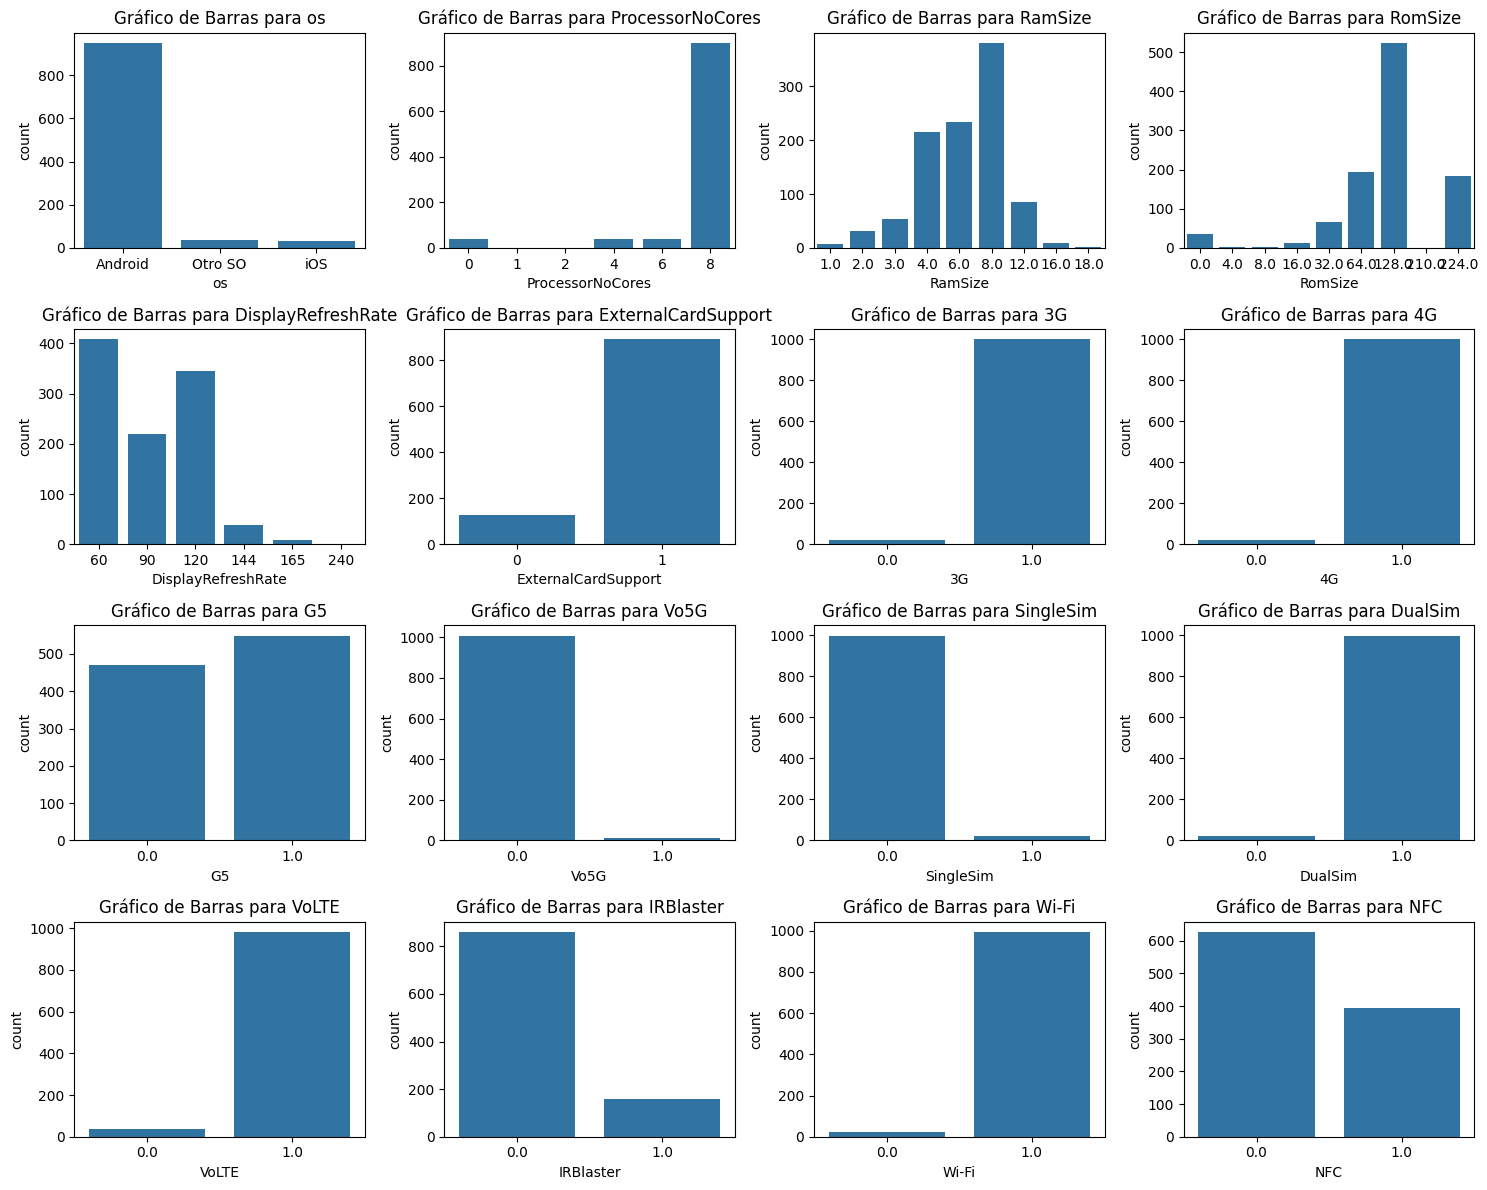

In [139]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 12))

# Crear gráficos de barras para cada columna discreta
for i, columna in enumerate(columnas_discretas, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=columna, data=phones_final)
    plt.title(f'Gráfico de Barras para {columna}')

# Ajustes de diseño
plt.tight_layout()
plt.show()

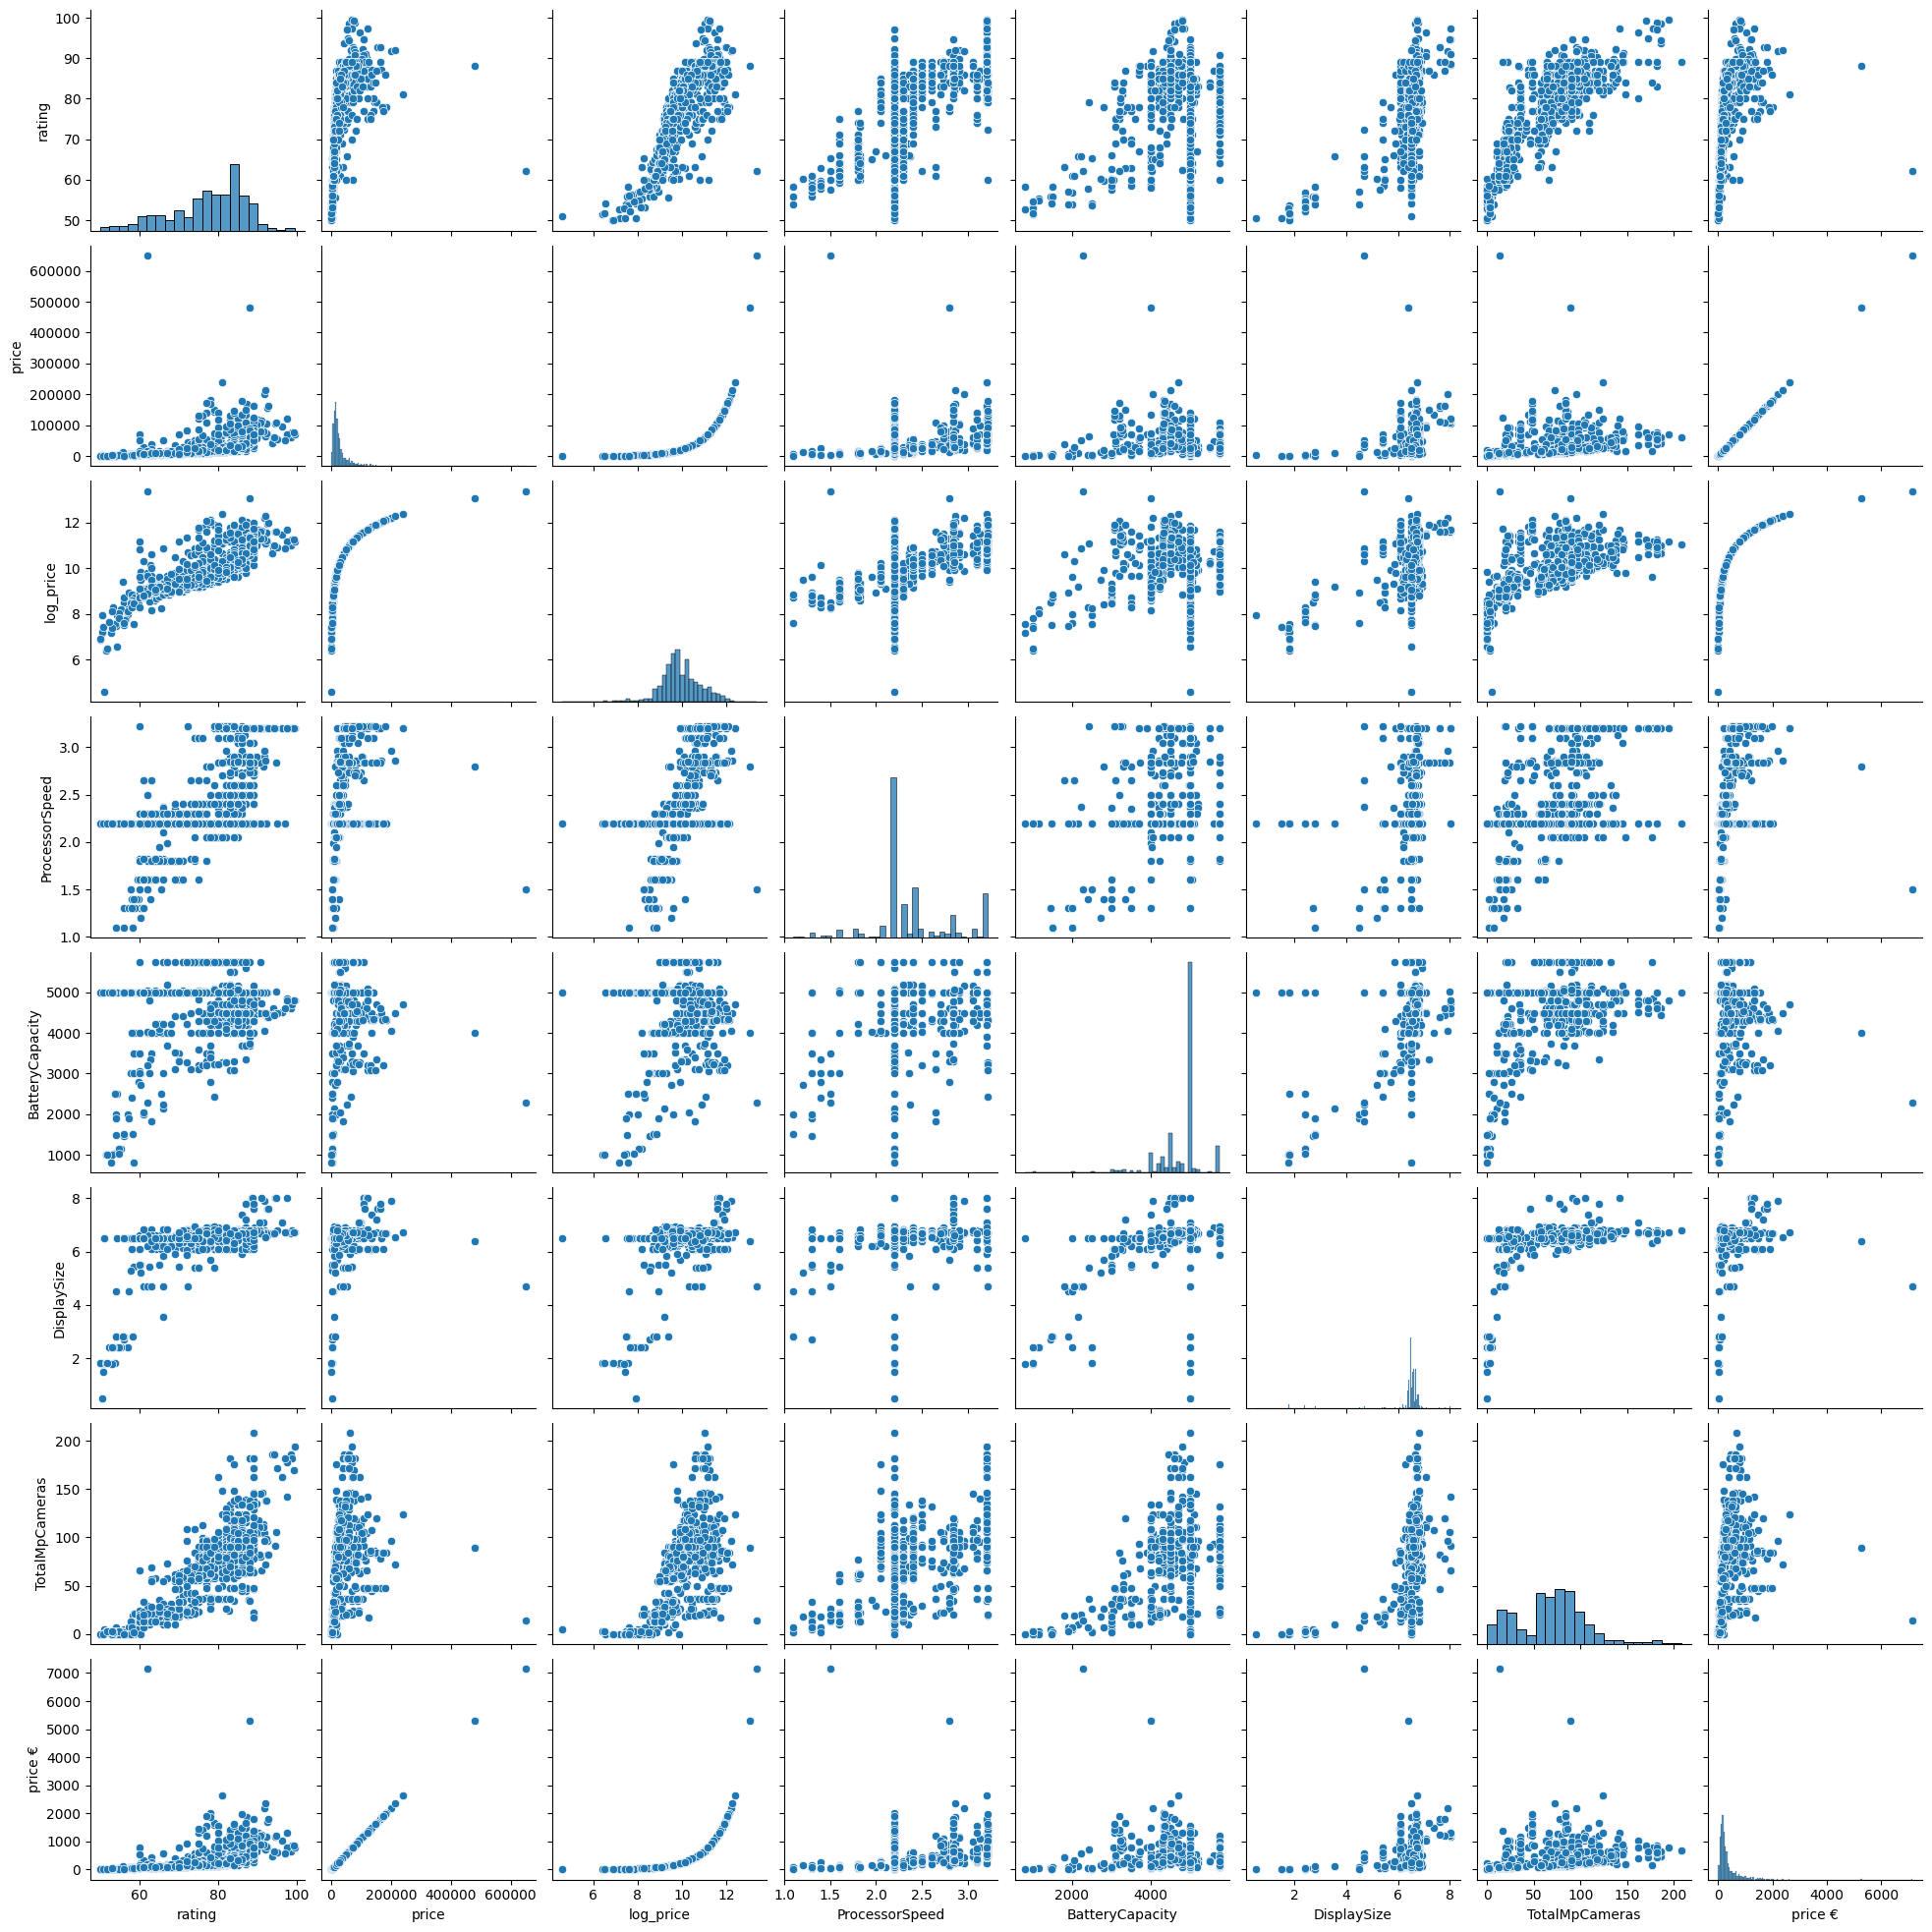

In [140]:
# Crear pairplot
sns.pairplot(phones_final[columnas_continuas])
plt.show()